In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import math
import seaborn as sns
#from mpl_toolkits.mplot3d import Axes3D
#from sklearn.preprocessing import StandardScaler

In [2]:
cd

C:\Users\acer


In [3]:
train = pd.read_csv("train.csv")
train.head()

,UniqueID,disbursed_amount,asset_cost,ltv,branch_id,supplier_id,manufacturer_id,Current_pincode_ID,Date.of.Birth,Employment.Type,...,SEC.SANCTIONED.AMOUNT,SEC.DISBURSED.AMOUNT,PRIMARY.INSTAL.AMT,SEC.INSTAL.AMT,NEW.ACCTS.IN.LAST.SIX.MONTHS,DELINQUENT.ACCTS.IN.LAST.SIX.MONTHS,AVERAGE.ACCT.AGE,CREDIT.HISTORY.LENGTH,NO.OF_INQUIRIES,loan_default
0,420825,50578,58400,89.55,67,22807,45,1441,01-01-84,Salaried,...,0,0,0,0,0,0,0yrs 0mon,0yrs 0mon,0,0
1,537409,47145,65550,73.23,67,22807,45,1502,31-07-85,Self employed,...,0,0,1991,0,0,1,1yrs 11mon,1yrs 11mon,0,1
2,417566,53278,61360,89.63,67,22807,45,1497,24-08-85,Self employed,...,0,0,0,0,0,0,0yrs 0mon,0yrs 0mon,0,0
3,624493,57513,66113,88.48,67,22807,45,1501,30-12-93,Self employed,...,0,0,31,0,0,0,0yrs 8mon,1yrs 3mon,1,1
4,539055,52378,60300,88.39,67,22807,45,1495,09-12-77,Self employed,...,0,0,0,0,0,0,0yrs 0mon,0yrs 0mon,1,1


In [4]:
train.shape

(233154, 41)

In [5]:
tr= train

In [6]:
tr.columns

Index(['UniqueID', 'disbursed_amount', 'asset_cost', 'ltv', 'branch_id',
       'supplier_id', 'manufacturer_id', 'Current_pincode_ID', 'Date.of.Birth',
       'Employment.Type', 'DisbursalDate', 'State_ID', 'Employee_code_ID',
       'MobileNo_Avl_Flag', 'Aadhar_flag', 'PAN_flag', 'VoterID_flag',
       'Driving_flag', 'Passport_flag', 'PERFORM_CNS.SCORE',
       'PERFORM_CNS.SCORE.DESCRIPTION', 'PRI.NO.OF.ACCTS', 'PRI.ACTIVE.ACCTS',
       'PRI.OVERDUE.ACCTS', 'PRI.CURRENT.BALANCE', 'PRI.SANCTIONED.AMOUNT',
       'PRI.DISBURSED.AMOUNT', 'SEC.NO.OF.ACCTS', 'SEC.ACTIVE.ACCTS',
       'SEC.OVERDUE.ACCTS', 'SEC.CURRENT.BALANCE', 'SEC.SANCTIONED.AMOUNT',
       'SEC.DISBURSED.AMOUNT', 'PRIMARY.INSTAL.AMT', 'SEC.INSTAL.AMT',
       'NEW.ACCTS.IN.LAST.SIX.MONTHS', 'DELINQUENT.ACCTS.IN.LAST.SIX.MONTHS',
       'AVERAGE.ACCT.AGE', 'CREDIT.HISTORY.LENGTH', 'NO.OF_INQUIRIES',
       'loan_default'],
      dtype='object')

In [7]:
tr.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 233154 entries, 0 to 233153
Data columns (total 41 columns):
UniqueID                               233154 non-null int64
disbursed_amount                       233154 non-null int64
asset_cost                             233154 non-null int64
ltv                                    233154 non-null float64
branch_id                              233154 non-null int64
supplier_id                            233154 non-null int64
manufacturer_id                        233154 non-null int64
Current_pincode_ID                     233154 non-null int64
Date.of.Birth                          233154 non-null object
Employment.Type                        225493 non-null object
DisbursalDate                          233154 non-null object
State_ID                               233154 non-null int64
Employee_code_ID                       233154 non-null int64
MobileNo_Avl_Flag                      233154 non-null int64
Aadhar_flag                   

In [8]:
tr.set_index('UniqueID', inplace =True)

In [10]:
tr['loan_default'].value_counts()

0    182543
1     50611
Name: loan_default, dtype: int64

In [11]:
test = pd.read_csv('test.csv')
test.head()

,UniqueID,disbursed_amount,asset_cost,ltv,branch_id,supplier_id,manufacturer_id,Current_pincode_ID,Date.of.Birth,Employment.Type,...,SEC.CURRENT.BALANCE,SEC.SANCTIONED.AMOUNT,SEC.DISBURSED.AMOUNT,PRIMARY.INSTAL.AMT,SEC.INSTAL.AMT,NEW.ACCTS.IN.LAST.SIX.MONTHS,DELINQUENT.ACCTS.IN.LAST.SIX.MONTHS,AVERAGE.ACCT.AGE,CREDIT.HISTORY.LENGTH,NO.OF_INQUIRIES
0,655269,53478,63558,86.54,67,22807,45,1497,01-01-74,Salaried,...,0,0,0,0,0,0,0,0yrs 0mon,0yrs 0mon,0
1,723482,55513,63163,89.45,67,22807,45,1497,20-05-85,Self employed,...,0,0,0,5605,0,1,0,0yrs 8mon,1yrs 0mon,1
2,758529,65282,84320,79.93,78,23135,86,2071,14-10-95,Salaried,...,0,0,0,0,0,0,0,0yrs 0mon,0yrs 0mon,0
3,763449,46905,63896,76.58,78,17014,45,2070,01-06-73,Self employed,...,0,0,0,0,0,0,0,2yrs 5mon,2yrs 5mon,0
4,708663,51428,63896,86.08,78,17014,45,2069,01-06-72,Salaried,...,0,0,0,0,0,0,0,0yrs 0mon,0yrs 0mon,0


In [13]:
ts = test.set_index('UniqueID')

In [14]:
ts.head()

,disbursed_amount,asset_cost,ltv,branch_id,supplier_id,manufacturer_id,Current_pincode_ID,Date.of.Birth,Employment.Type,DisbursalDate,...,SEC.CURRENT.BALANCE,SEC.SANCTIONED.AMOUNT,SEC.DISBURSED.AMOUNT,PRIMARY.INSTAL.AMT,SEC.INSTAL.AMT,NEW.ACCTS.IN.LAST.SIX.MONTHS,DELINQUENT.ACCTS.IN.LAST.SIX.MONTHS,AVERAGE.ACCT.AGE,CREDIT.HISTORY.LENGTH,NO.OF_INQUIRIES
UniqueID,,,,,,,,,,,,,,,,,,,,,
655269,53478,63558,86.54,67,22807,45,1497,01-01-74,Salaried,03-11-18,...,0,0,0,0,0,0,0,0yrs 0mon,0yrs 0mon,0
723482,55513,63163,89.45,67,22807,45,1497,20-05-85,Self employed,20-11-18,...,0,0,0,5605,0,1,0,0yrs 8mon,1yrs 0mon,1
758529,65282,84320,79.93,78,23135,86,2071,14-10-95,Salaried,29-11-18,...,0,0,0,0,0,0,0,0yrs 0mon,0yrs 0mon,0
763449,46905,63896,76.58,78,17014,45,2070,01-06-73,Self employed,29-11-18,...,0,0,0,0,0,0,0,2yrs 5mon,2yrs 5mon,0
708663,51428,63896,86.08,78,17014,45,2069,01-06-72,Salaried,17-11-18,...,0,0,0,0,0,0,0,0yrs 0mon,0yrs 0mon,0


In [15]:
ts.columns

Index(['disbursed_amount', 'asset_cost', 'ltv', 'branch_id', 'supplier_id',
       'manufacturer_id', 'Current_pincode_ID', 'Date.of.Birth',
       'Employment.Type', 'DisbursalDate', 'State_ID', 'Employee_code_ID',
       'MobileNo_Avl_Flag', 'Aadhar_flag', 'PAN_flag', 'VoterID_flag',
       'Driving_flag', 'Passport_flag', 'PERFORM_CNS.SCORE',
       'PERFORM_CNS.SCORE.DESCRIPTION', 'PRI.NO.OF.ACCTS', 'PRI.ACTIVE.ACCTS',
       'PRI.OVERDUE.ACCTS', 'PRI.CURRENT.BALANCE', 'PRI.SANCTIONED.AMOUNT',
       'PRI.DISBURSED.AMOUNT', 'SEC.NO.OF.ACCTS', 'SEC.ACTIVE.ACCTS',
       'SEC.OVERDUE.ACCTS', 'SEC.CURRENT.BALANCE', 'SEC.SANCTIONED.AMOUNT',
       'SEC.DISBURSED.AMOUNT', 'PRIMARY.INSTAL.AMT', 'SEC.INSTAL.AMT',
       'NEW.ACCTS.IN.LAST.SIX.MONTHS', 'DELINQUENT.ACCTS.IN.LAST.SIX.MONTHS',
       'AVERAGE.ACCT.AGE', 'CREDIT.HISTORY.LENGTH', 'NO.OF_INQUIRIES'],
      dtype='object')

In [16]:
tr.isnull().sum()

disbursed_amount                          0
asset_cost                                0
ltv                                       0
branch_id                                 0
supplier_id                               0
manufacturer_id                           0
Current_pincode_ID                        0
Date.of.Birth                             0
Employment.Type                        7661
DisbursalDate                             0
State_ID                                  0
Employee_code_ID                          0
MobileNo_Avl_Flag                         0
Aadhar_flag                               0
PAN_flag                                  0
VoterID_flag                              0
Driving_flag                              0
Passport_flag                             0
PERFORM_CNS.SCORE                         0
PERFORM_CNS.SCORE.DESCRIPTION             0
PRI.NO.OF.ACCTS                           0
PRI.ACTIVE.ACCTS                          0
PRI.OVERDUE.ACCTS               

In [16]:
ts.isnull().sum()

disbursed_amount                          0
asset_cost                                0
ltv                                       0
branch_id                                 0
supplier_id                               0
manufacturer_id                           0
Current_pincode_ID                        0
Date.of.Birth                             0
Employment.Type                        3443
DisbursalDate                             0
State_ID                                  0
Employee_code_ID                          0
MobileNo_Avl_Flag                         0
Aadhar_flag                               0
PAN_flag                                  0
VoterID_flag                              0
Driving_flag                              0
Passport_flag                             0
PERFORM_CNS.SCORE                         0
PERFORM_CNS.SCORE.DESCRIPTION             0
PRI.NO.OF.ACCTS                           0
PRI.ACTIVE.ACCTS                          0
PRI.OVERDUE.ACCTS               

In [32]:
ts.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 112392 entries, 655269 to 755244
Data columns (total 39 columns):
disbursed_amount                       112392 non-null int64
asset_cost                             112392 non-null int64
ltv                                    112392 non-null float64
branch_id                              112392 non-null int64
supplier_id                            112392 non-null int64
manufacturer_id                        112392 non-null int64
Current_pincode_ID                     112392 non-null int64
Date.of.Birth                          112392 non-null object
Employment.Type                        112392 non-null object
DisbursalDate                          112392 non-null object
State_ID                               112392 non-null int64
Employee_code_ID                       112392 non-null int64
MobileNo_Avl_Flag                      112392 non-null int64
Aadhar_flag                            112392 non-null int64
PAN_flag                 

### Q1.1. Can you make a bar plot or a histogram?


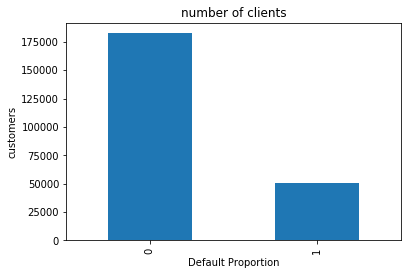

In [41]:
## Train data showing the default proportions where 0 denotes as non-default and 1 denotes as default
tr.loan_default.value_counts().plot.bar()
plt.xlabel('Default Proportion')
plt.ylabel('customers')
plt.title('number of clients')
plt.show()

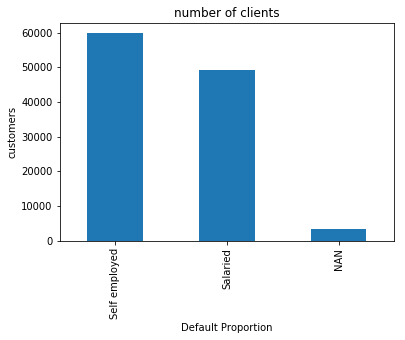

In [42]:
##Test data showing the employment info of the customers

ts['Employment.Type'].value_counts().plot.bar()
plt.xlabel('Default Proportion')
plt.ylabel('customers')
plt.title('number of clients')
plt.show()

In [31]:
ts['MobileNo_Avl_Flag'].count()

112392

In [17]:
train['Employment.Type'].value_counts()

Self employed    127635
Salaried          97858
Name: Employment.Type, dtype: int64

In [18]:
ts['Employment.Type'].value_counts()

Self employed    59794
Salaried         49155
Name: Employment.Type, dtype: int64

In [19]:
tr.fillna('NAN',inplace=True)
ts.fillna('NAN',inplace=True)

In [20]:
tr['Employment.Type'].value_counts(normalize=True)

Self employed    0.547428
Salaried         0.419714
NAN              0.032858
Name: Employment.Type, dtype: float64

### Q1.2. Can you count something interesting?

In [21]:
ts['Employment.Type'].value_counts(normalize=True)

Self employed    0.532013
Salaried         0.437353
NAN              0.030634
Name: Employment.Type, dtype: float64

Thus the missing values in train data is 3.28% and missing values in test data is 3.06% fo rthe employment data. The data reflects that the details of the customers whose are not updated as to business type may also be the people who can be at a high risk of default if they don't have an actual employment. Since we don't have the info regarding the employment type of these people and they constitute only small dataset, we can update the missing values as NAN and drop them to do further analysis and check if still we can get significant results

In [33]:
#Creating function for checking the correlation between variables
def correlationplot(data,width):
    corr = data.corr()
    plt.figure(num=None,figsize=(width, width), dpi=80, facecolor='w', edgecolor='black')
    corrMat = plt.matshow(corr, fignum = 1)
    plt.xticks(range(len(corr.columns)), corr.columns, rotation=90)
    plt.yticks(range(len(corr.columns)), corr.columns)
    plt.gca().xaxis.tick_bottom()
    plt.colorbar(corrMat)
    plt.title('Correlation Matrix')
    plt.show()

In [34]:
train.corr()

,disbursed_amount,asset_cost,ltv,branch_id,supplier_id,manufacturer_id,Current_pincode_ID,State_ID,Employee_code_ID,MobileNo_Avl_Flag,...,SEC.OVERDUE.ACCTS,SEC.CURRENT.BALANCE,SEC.SANCTIONED.AMOUNT,SEC.DISBURSED.AMOUNT,PRIMARY.INSTAL.AMT,SEC.INSTAL.AMT,NEW.ACCTS.IN.LAST.SIX.MONTHS,DELINQUENT.ACCTS.IN.LAST.SIX.MONTHS,NO.OF_INQUIRIES,loan_default
disbursed_amount,1.000000,0.752668,0.376747,0.018328,0.078596,0.095203,0.068540,-0.023956,0.010120,NaN,...,-0.007305,-0.004227,-0.005271,-0.005119,0.002350,-0.005525,0.035880,0.020198,0.038513,0.077675
asset_cost,0.752668,1.000000,-0.301188,0.018586,0.150002,-0.005256,0.275878,-0.026348,0.008711,NaN,...,-0.013455,-0.008697,-0.010776,-0.010594,-0.004356,-0.005738,-0.021968,-0.007932,-0.017301,0.014261
ltv,0.376747,-0.301188,1.000000,0.006382,-0.103732,0.121003,-0.300112,0.004882,0.004940,NaN,...,0.010256,0.007195,0.008800,0.008733,0.007358,0.000481,0.083824,0.041921,0.085725,0.098208
branch_id,0.018328,0.018586,0.006382,1.000000,0.225744,-0.049957,0.048192,0.187782,0.088764,NaN,...,-0.007104,0.001418,0.002404,0.002457,0.004955,0.004265,-0.008354,-0.001730,-0.001813,0.030193
supplier_id,0.078596,0.150002,-0.103732,0.225744,1.000000,-0.063916,0.187401,0.105502,0.095792,NaN,...,-0.015665,-0.008729,-0.010175,-0.010031,-0.011953,-0.005826,-0.053264,-0.024622,-0.030988,0.027357
manufacturer_id,0.095203,-0.005256,0.121003,-0.049957,-0.063916,1.000000,-0.104349,0.026412,-0.045009,NaN,...,0.008152,0.003106,0.003206,0.003301,0.014116,0.003020,0.050079,0.019438,0.010012,-0.025039
Current_pincode_ID,0.068540,0.275878,-0.300112,0.048192,0.187401,-0.104349,1.000000,0.047903,-0.042609,NaN,...,-0.036228,-0.021048,-0.026059,-0.025630,0.002275,-0.006305,-0.100080,-0.057419,-0.058821,0.028419
State_ID,-0.023956,-0.026348,0.004882,0.187782,0.105502,0.026412,0.047903,1.000000,0.117309,NaN,...,0.015679,0.013231,0.017842,0.017651,0.015843,0.009850,-0.014942,-0.000655,-0.016129,0.048075
Employee_code_ID,0.010120,0.008711,0.004940,0.088764,0.095792,-0.045009,-0.042609,0.117309,1.000000,NaN,...,-0.006537,-0.003543,-0.002259,-0.002224,0.013470,0.001894,0.005473,0.003624,-0.002108,0.020657
MobileNo_Avl_Flag,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [45]:
#Creating function for checking the relation between variables using histogram

def histogramplot(data, no_of_rows):
    nrow,ncol = data.shape
    for i in range (ncol,no_of_rows):
        plt.subplot(ncol,no_of_rows)
        plt.ylabel('counts')
        plt.xticks(rotation = 90)
        plt.show()
        
histogramplot(tr,8)

In [46]:
tr.reset_index(inplace=True)

In [47]:
tr.head()

,index,UniqueID,disbursed_amount,asset_cost,ltv,branch_id,supplier_id,manufacturer_id,Current_pincode_ID,Date.of.Birth,...,SEC.SANCTIONED.AMOUNT,SEC.DISBURSED.AMOUNT,PRIMARY.INSTAL.AMT,SEC.INSTAL.AMT,NEW.ACCTS.IN.LAST.SIX.MONTHS,DELINQUENT.ACCTS.IN.LAST.SIX.MONTHS,AVERAGE.ACCT.AGE,CREDIT.HISTORY.LENGTH,NO.OF_INQUIRIES,loan_default
0,0,420825,50578,58400,89.55,67,22807,45,1441,01-01-84,...,0,0,0,0,0,0,0yrs 0mon,0yrs 0mon,0,0
1,1,537409,47145,65550,73.23,67,22807,45,1502,31-07-85,...,0,0,1991,0,0,1,1yrs 11mon,1yrs 11mon,0,1
2,2,417566,53278,61360,89.63,67,22807,45,1497,24-08-85,...,0,0,0,0,0,0,0yrs 0mon,0yrs 0mon,0,0
3,3,624493,57513,66113,88.48,67,22807,45,1501,30-12-93,...,0,0,31,0,0,0,0yrs 8mon,1yrs 3mon,1,1
4,4,539055,52378,60300,88.39,67,22807,45,1495,09-12-77,...,0,0,0,0,0,0,0yrs 0mon,0yrs 0mon,1,1


### Q1.3. Can you make a scatterplot?


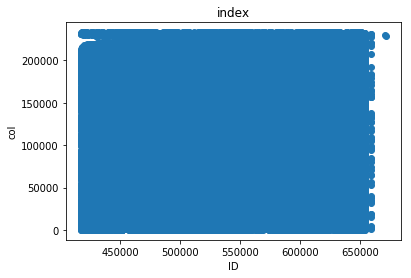

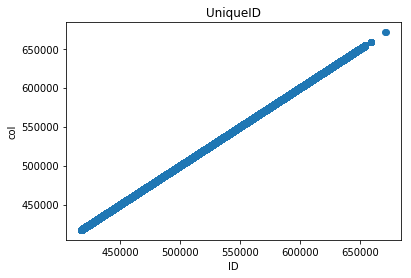

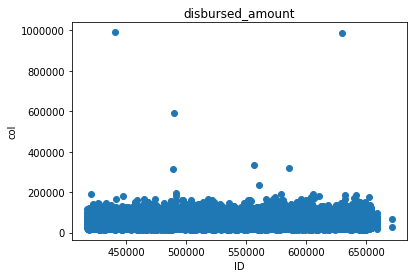

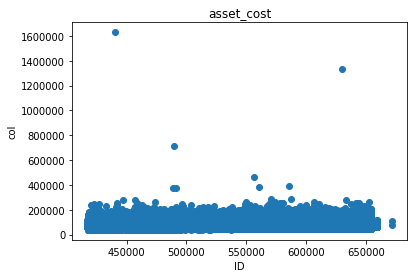

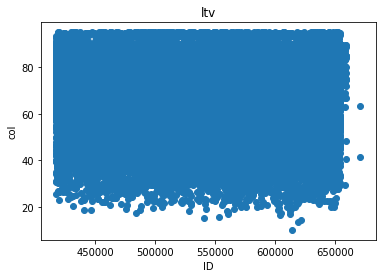

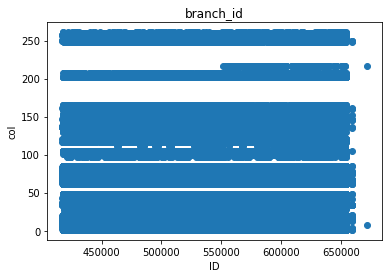

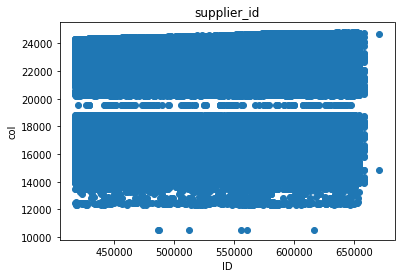

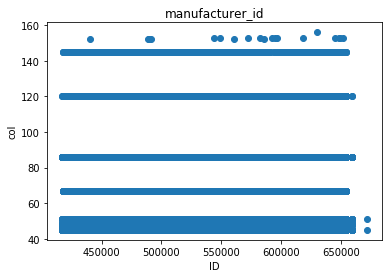

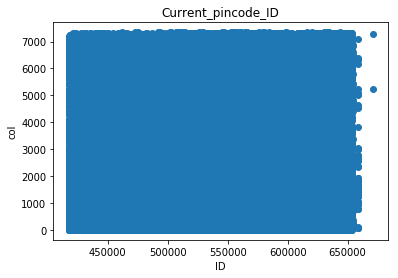

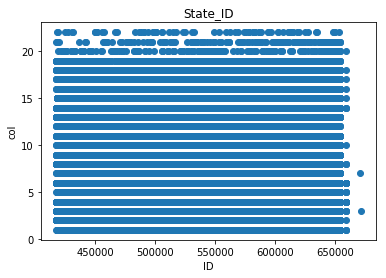

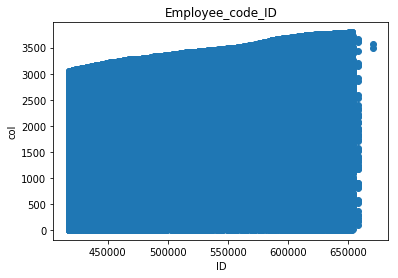

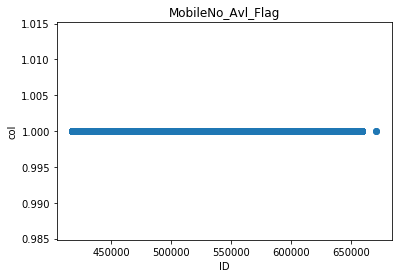

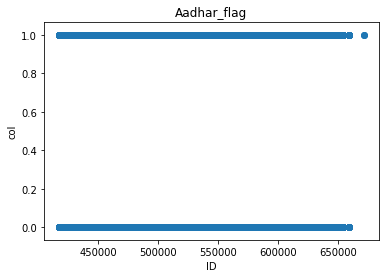

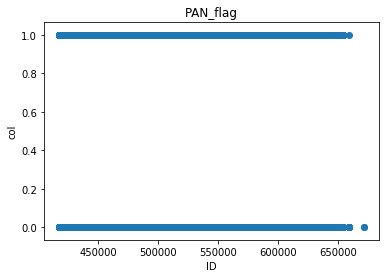

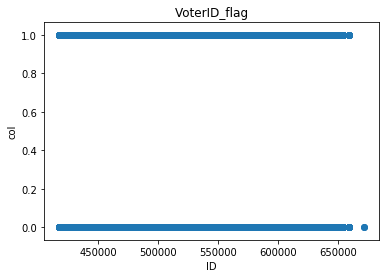

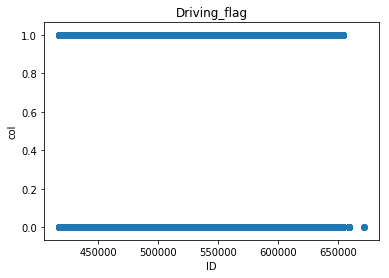

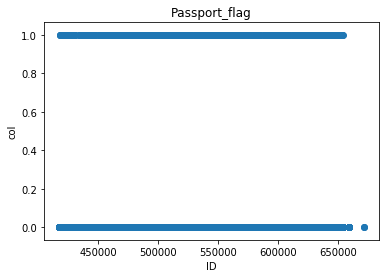

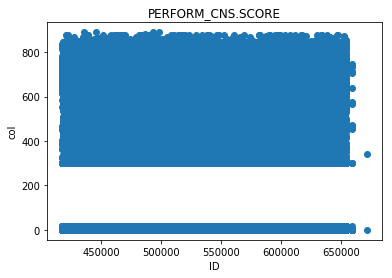

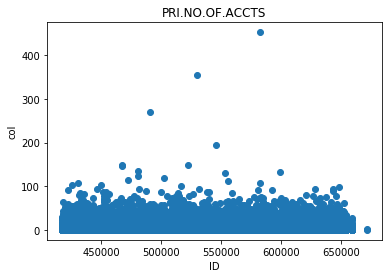

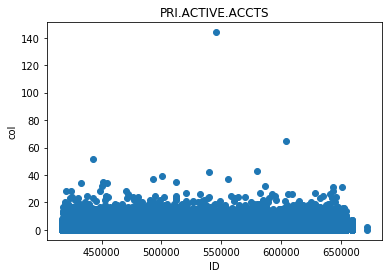

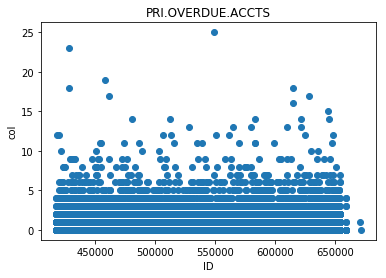

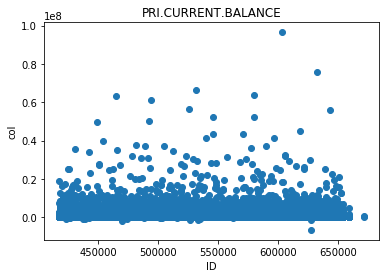

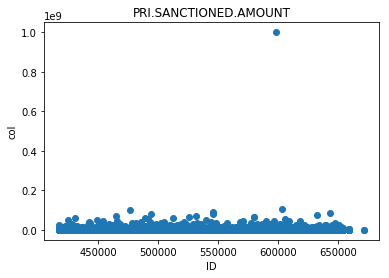

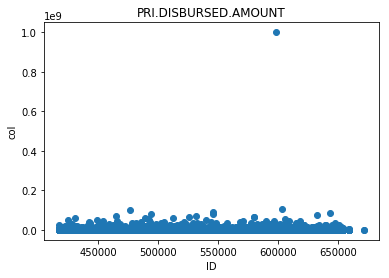

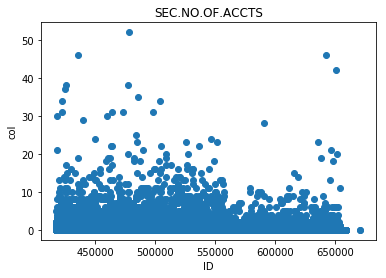

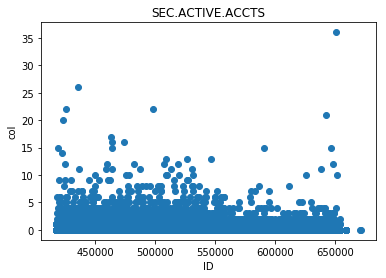

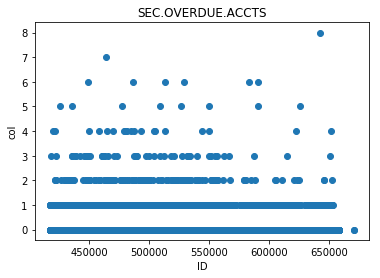

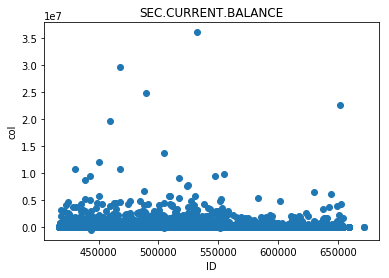

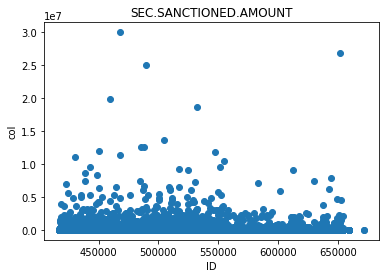

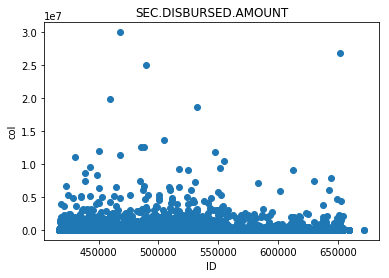

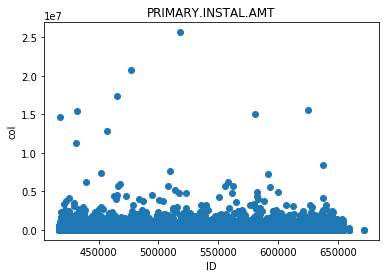

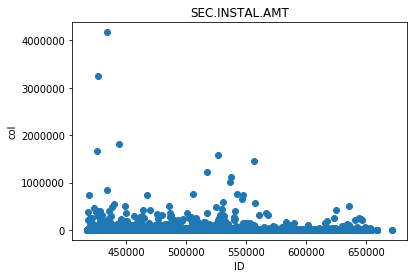

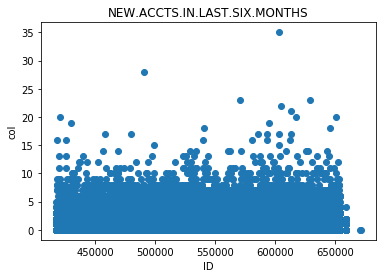

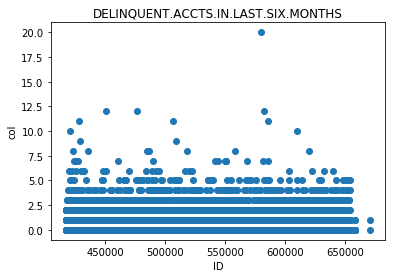

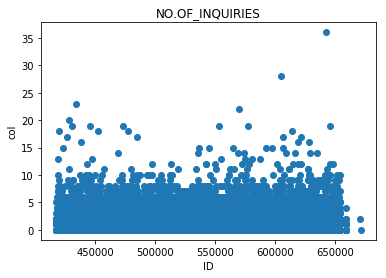

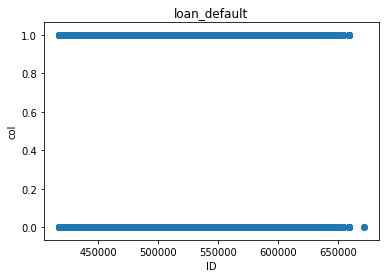

In [48]:
def print_all_values():
    df1=tr.drop('UniqueID',axis=1)
    cols=tr.columns
    for col in cols:
        if (tr[col].dtypes !='object'):

            fig1=plt.figure()
            ax1=plt.axes()
            plt.scatter(tr.UniqueID,tr[[col]],alpha=1)
            plt.title(col)
            ax1 = ax1.set(xlabel='ID', ylabel='col')
            plt.show()
            
            
print_all_values()

###### checking the pattern of differnet varibales w.r.t unique userid

<Figure size 432x288 with 0 Axes>

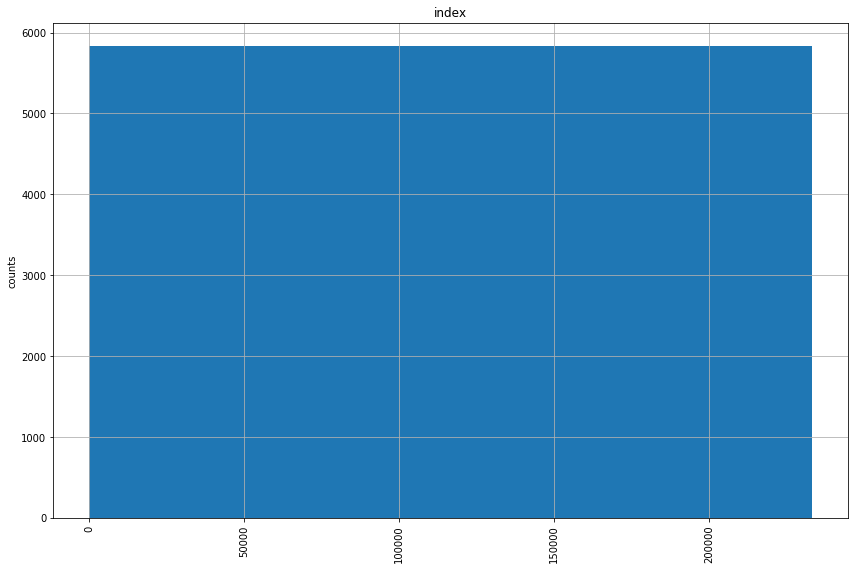

<Figure size 432x288 with 0 Axes>

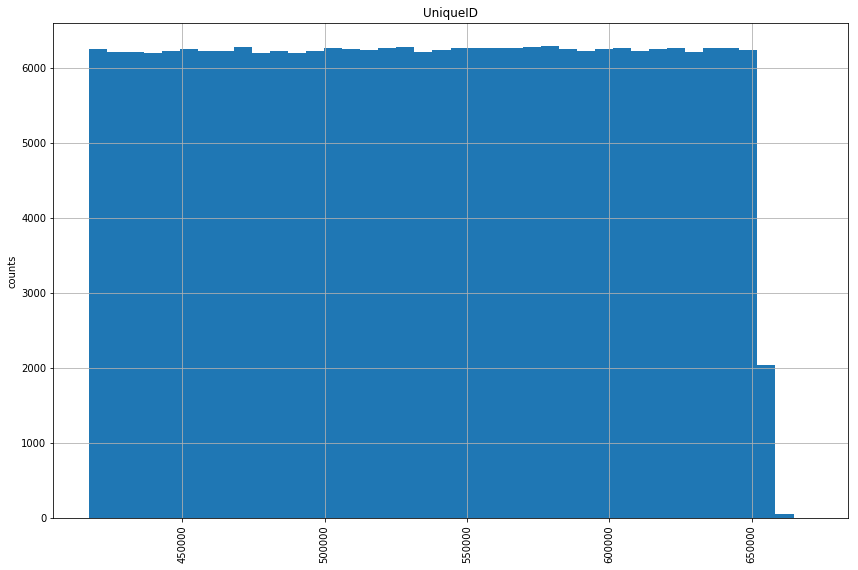

<Figure size 432x288 with 0 Axes>

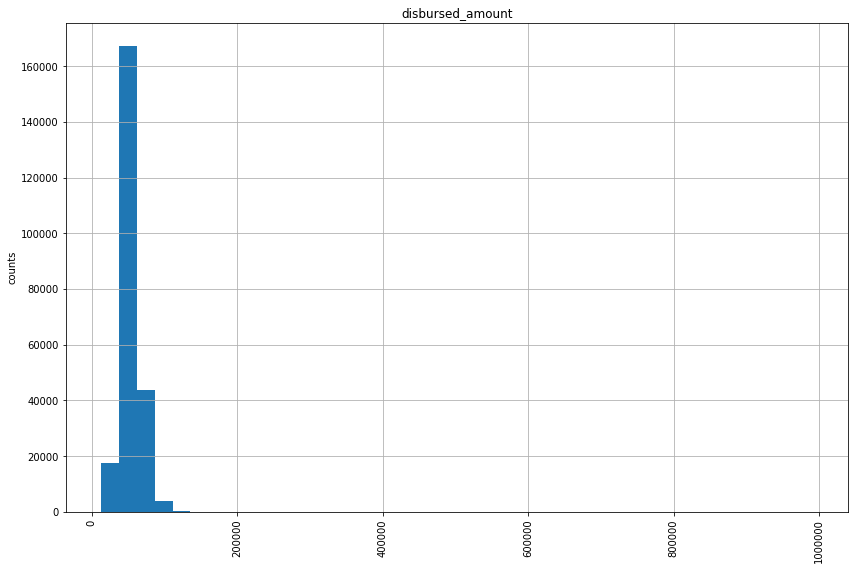

<Figure size 432x288 with 0 Axes>

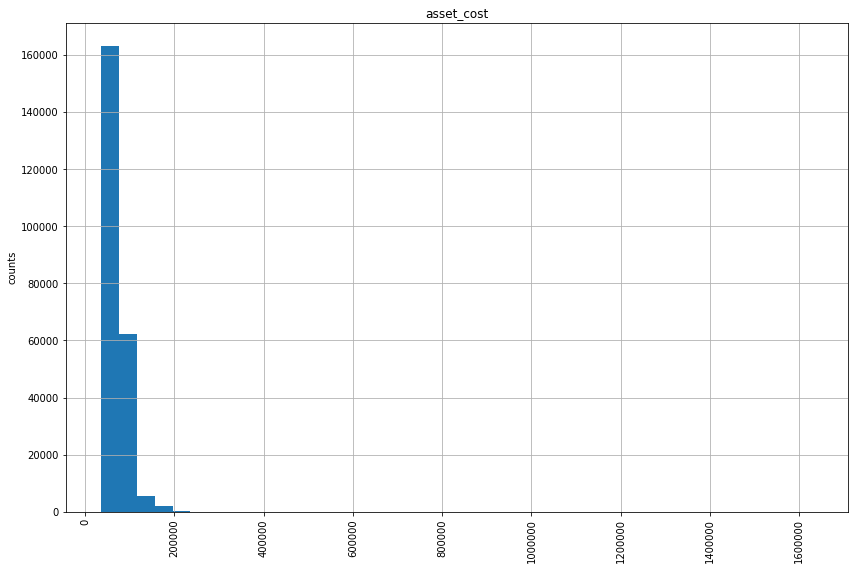

<Figure size 432x288 with 0 Axes>

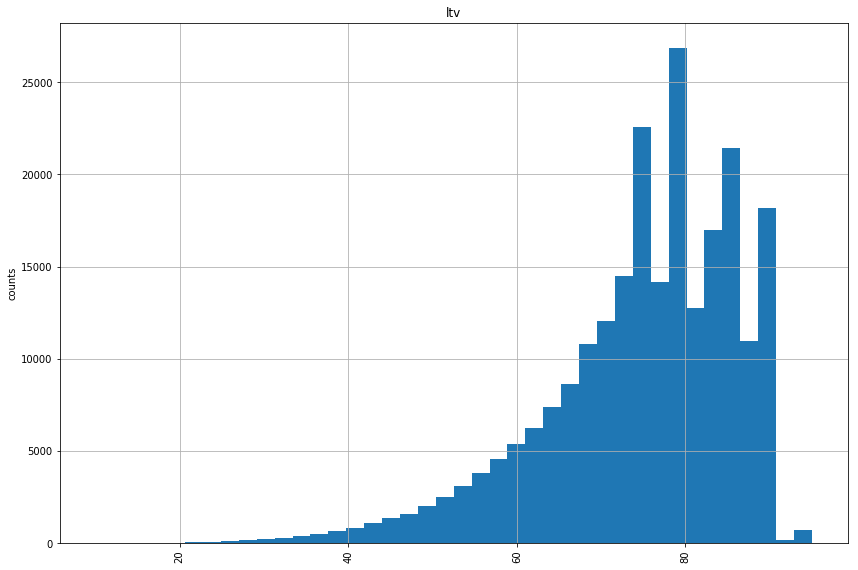

<Figure size 432x288 with 0 Axes>

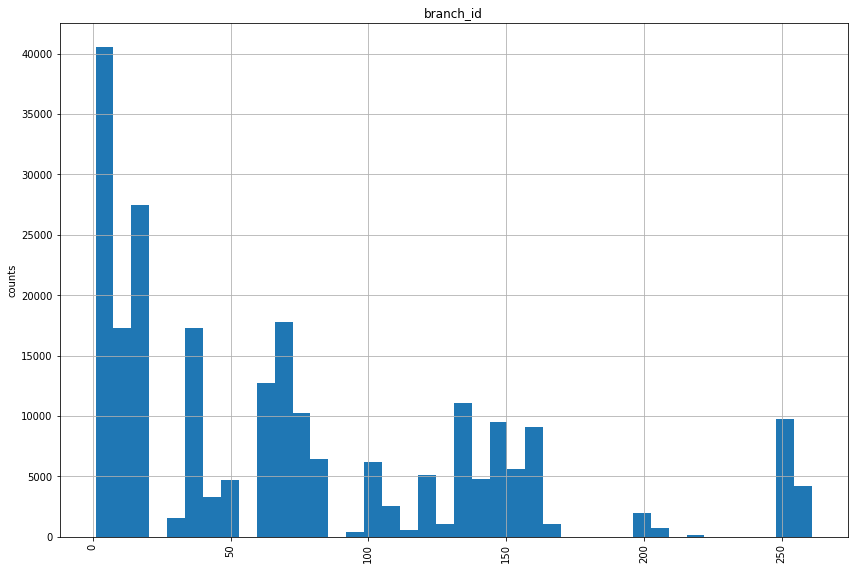

<Figure size 432x288 with 0 Axes>

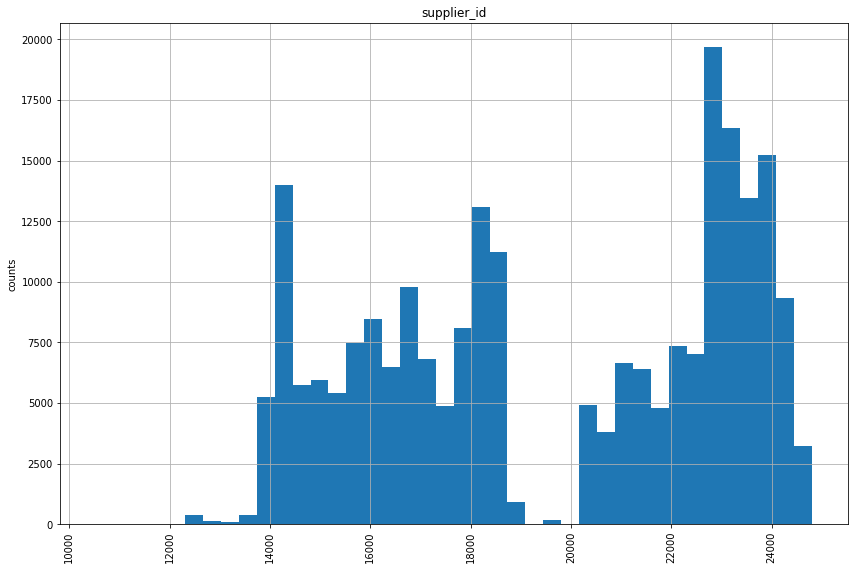

<Figure size 432x288 with 0 Axes>

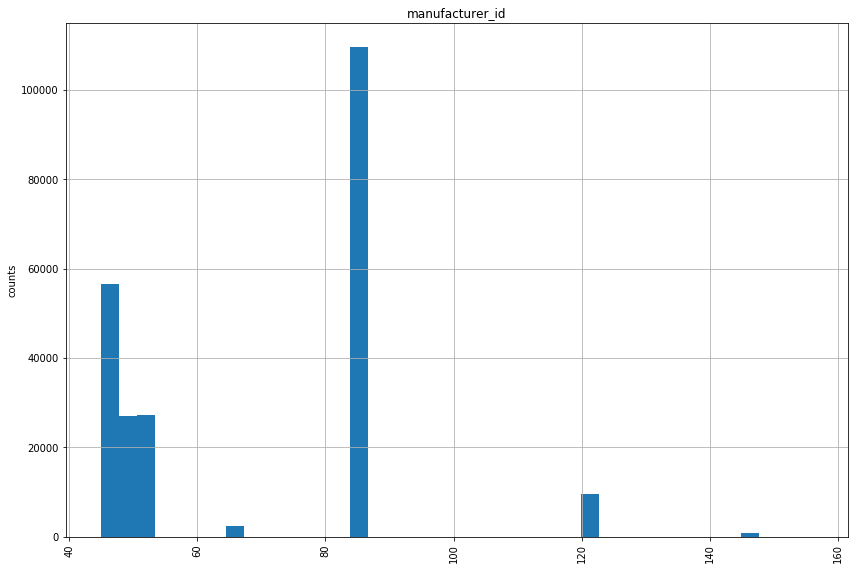

<Figure size 432x288 with 0 Axes>

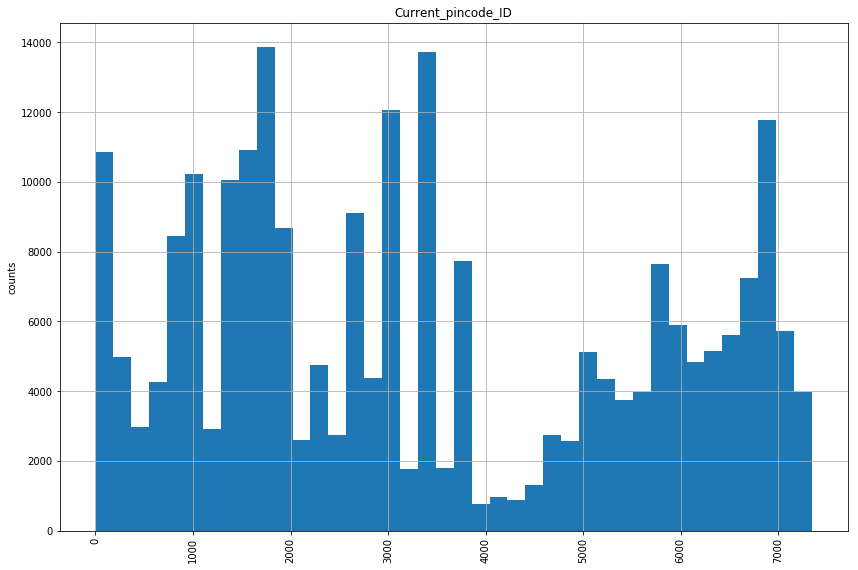

<Figure size 432x288 with 0 Axes>

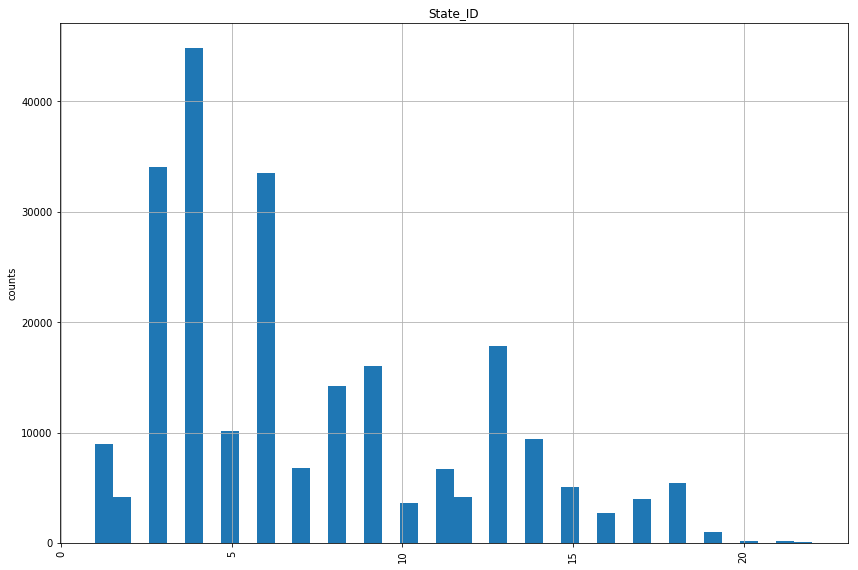

<Figure size 432x288 with 0 Axes>

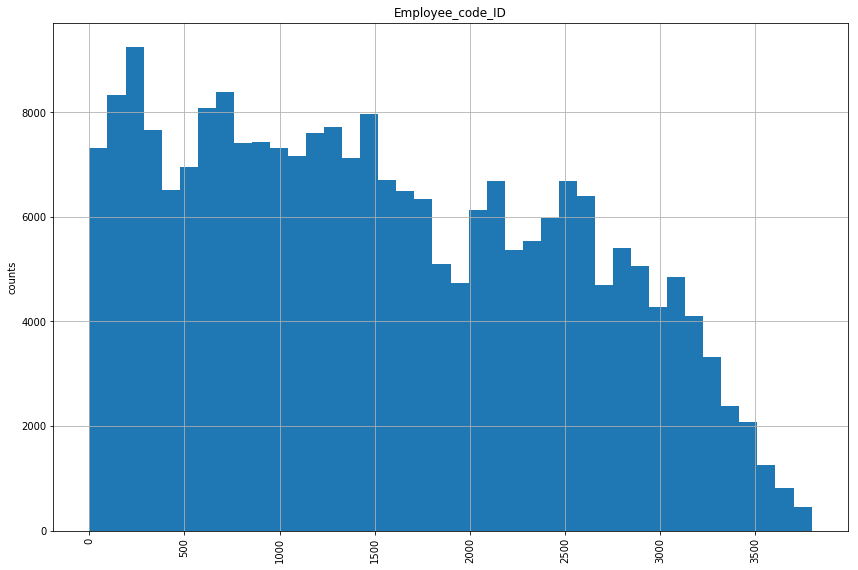

<Figure size 432x288 with 0 Axes>

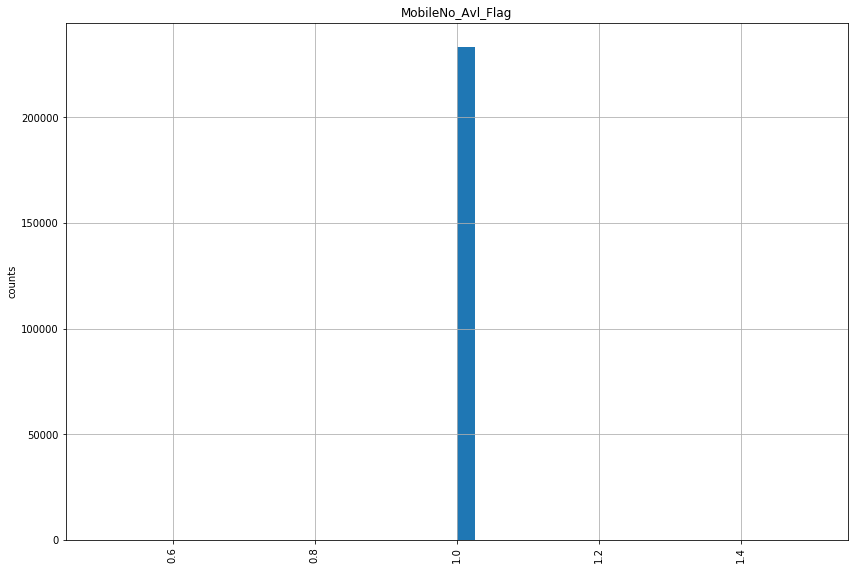

<Figure size 432x288 with 0 Axes>

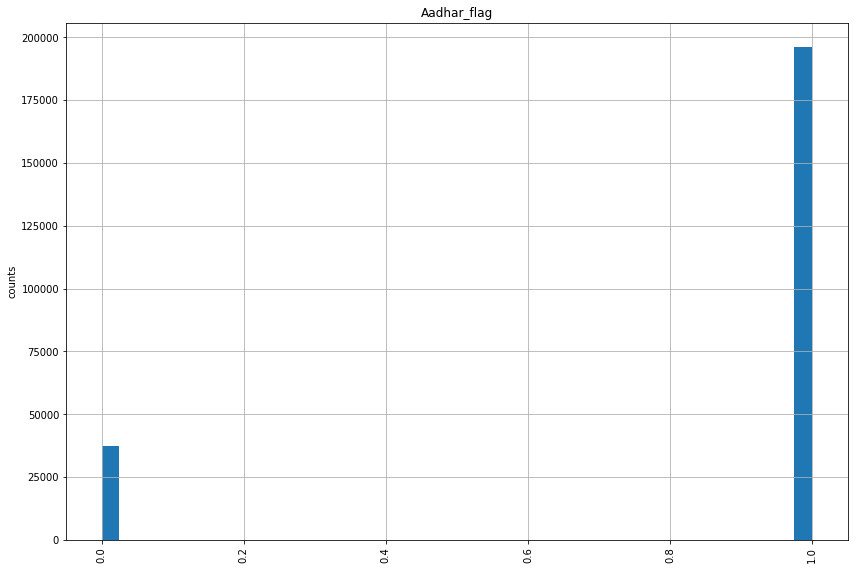

<Figure size 432x288 with 0 Axes>

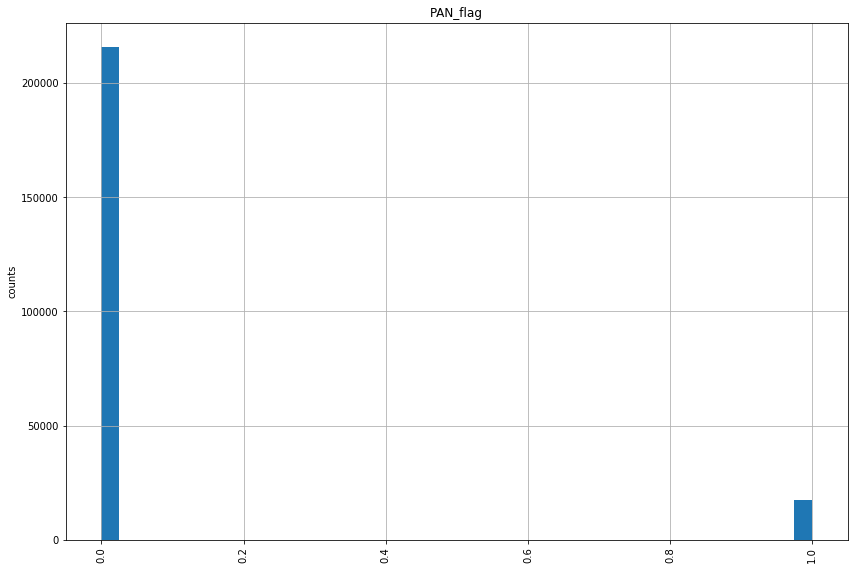

<Figure size 432x288 with 0 Axes>

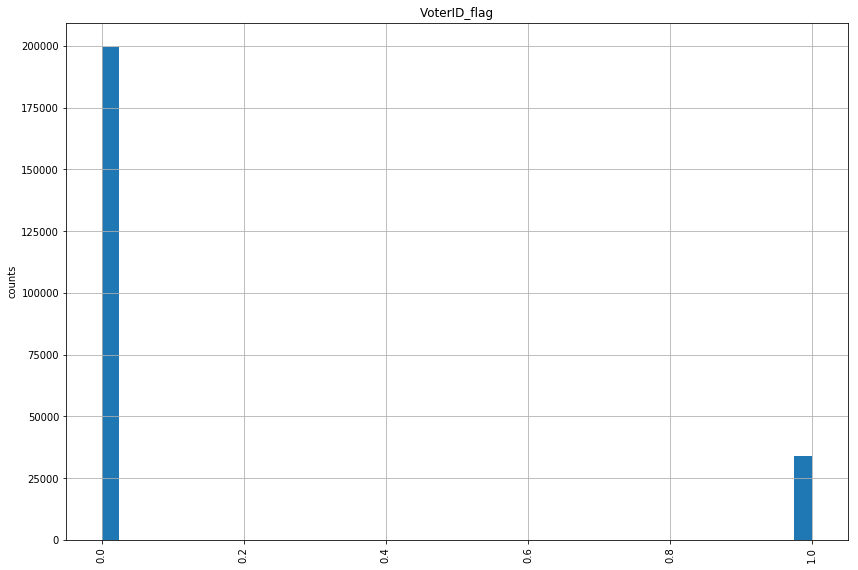

<Figure size 432x288 with 0 Axes>

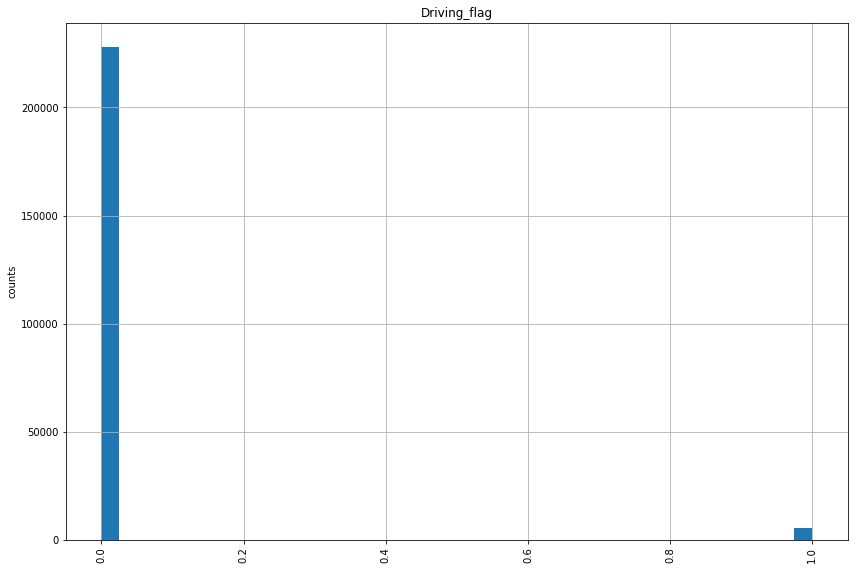

<Figure size 432x288 with 0 Axes>

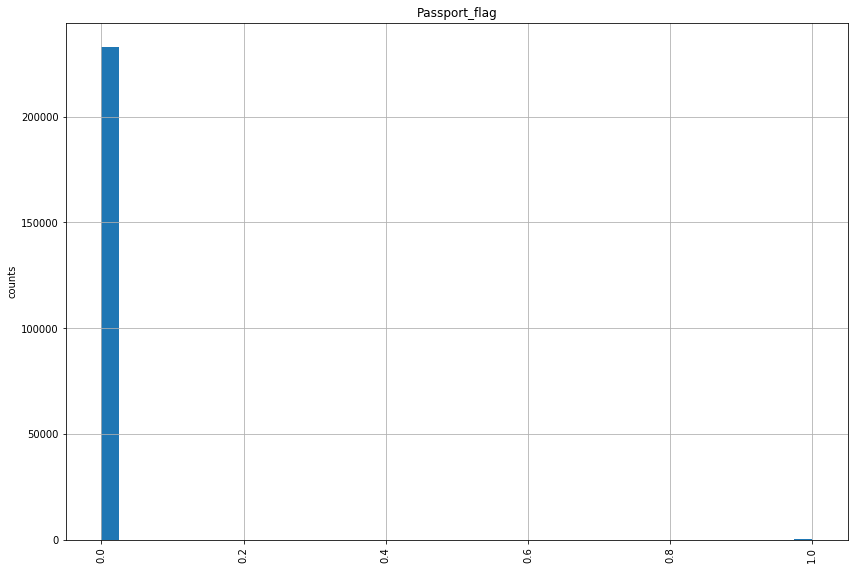

<Figure size 432x288 with 0 Axes>

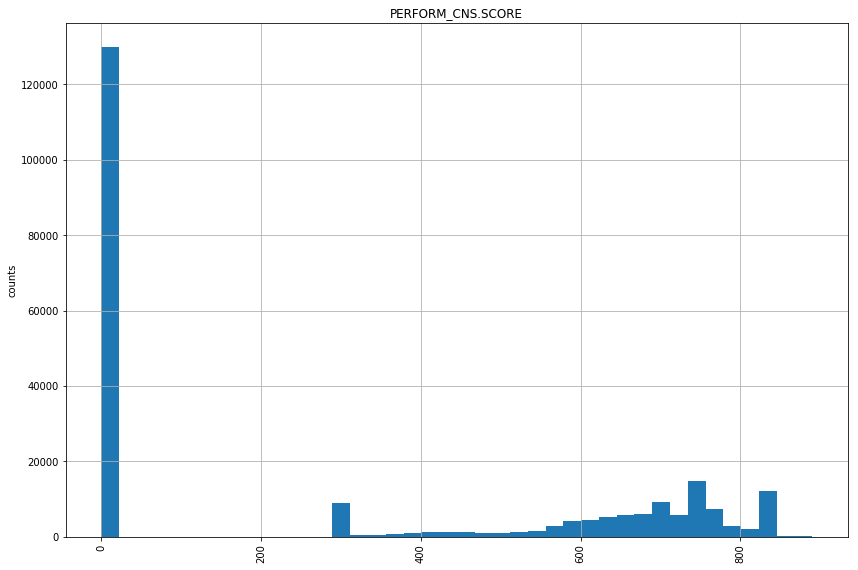

<Figure size 432x288 with 0 Axes>

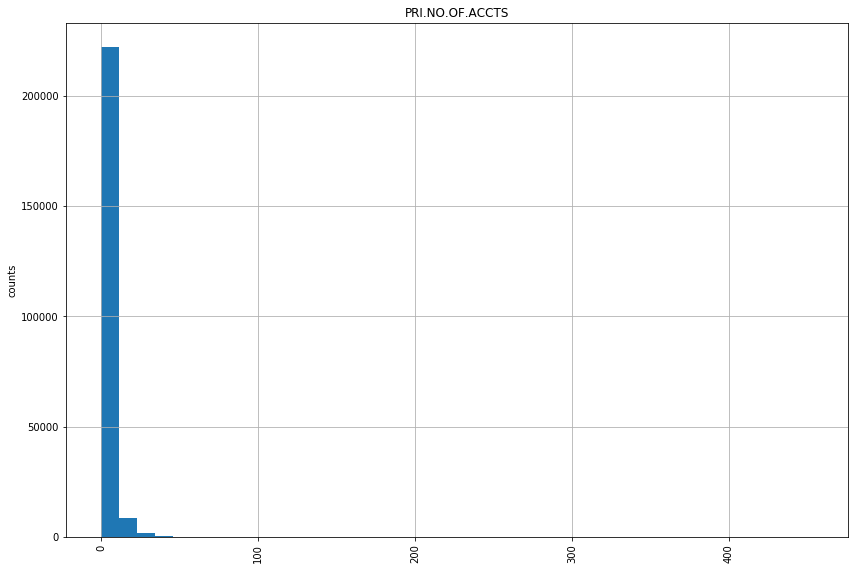

<Figure size 432x288 with 0 Axes>

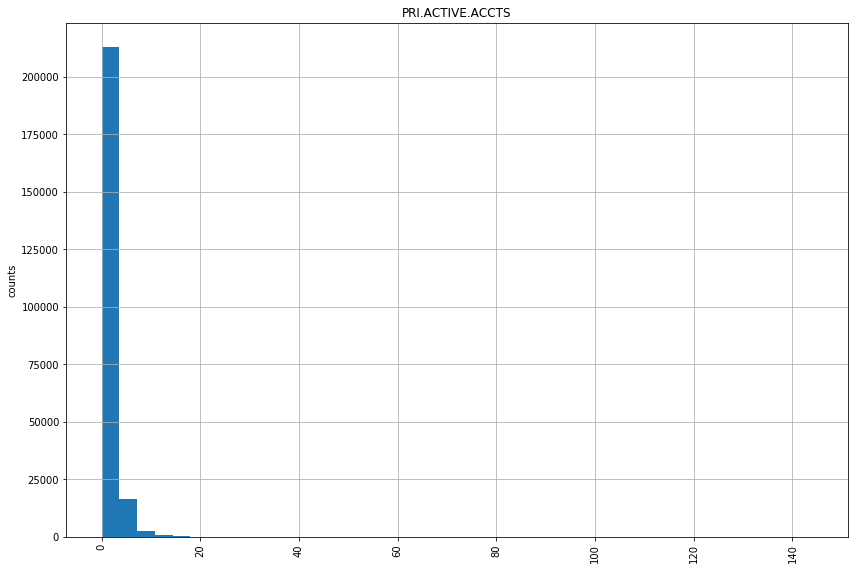

<Figure size 432x288 with 0 Axes>

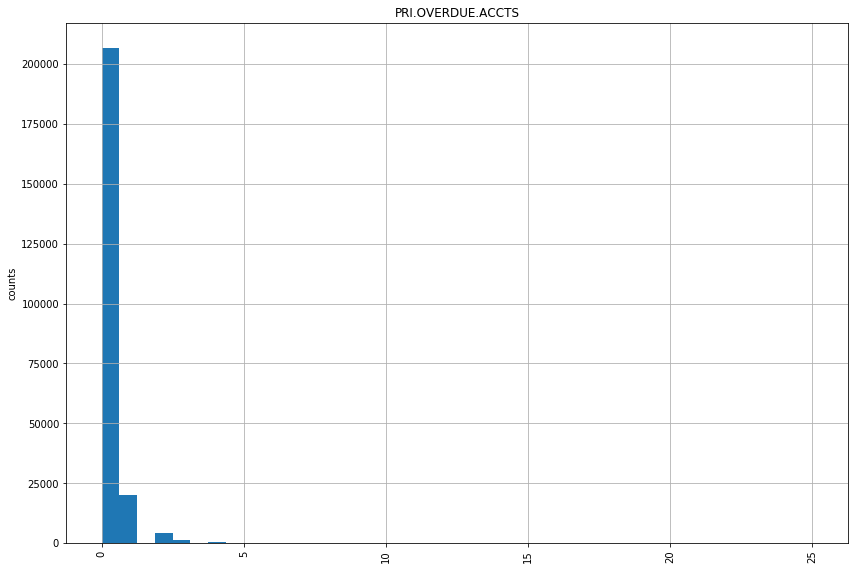

<Figure size 432x288 with 0 Axes>

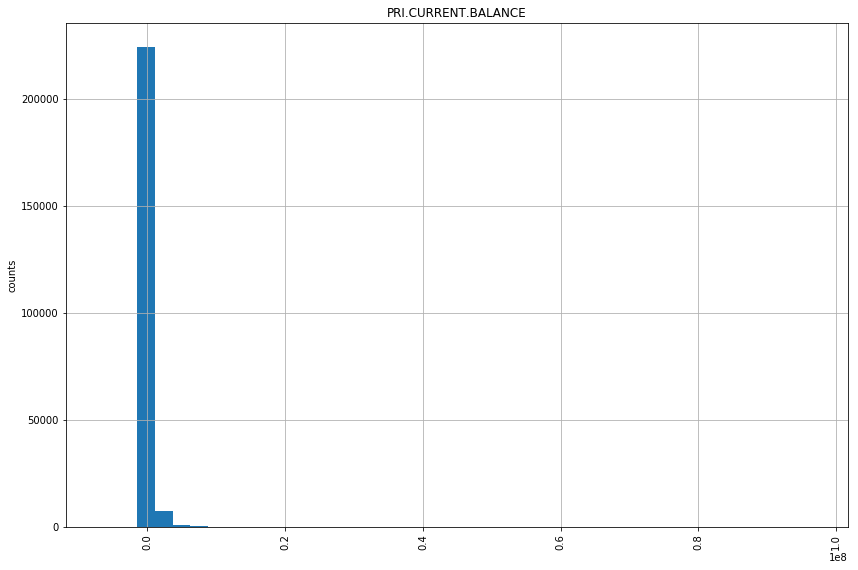

<Figure size 432x288 with 0 Axes>

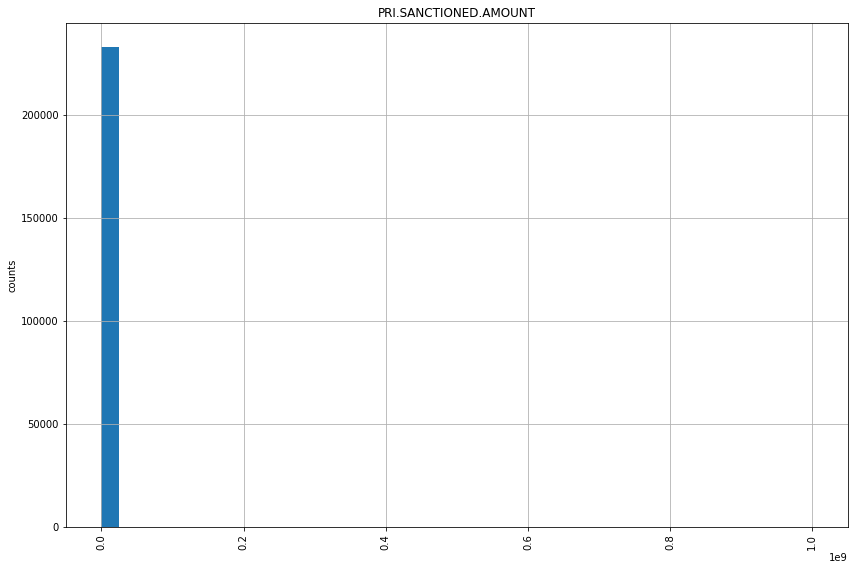

<Figure size 432x288 with 0 Axes>

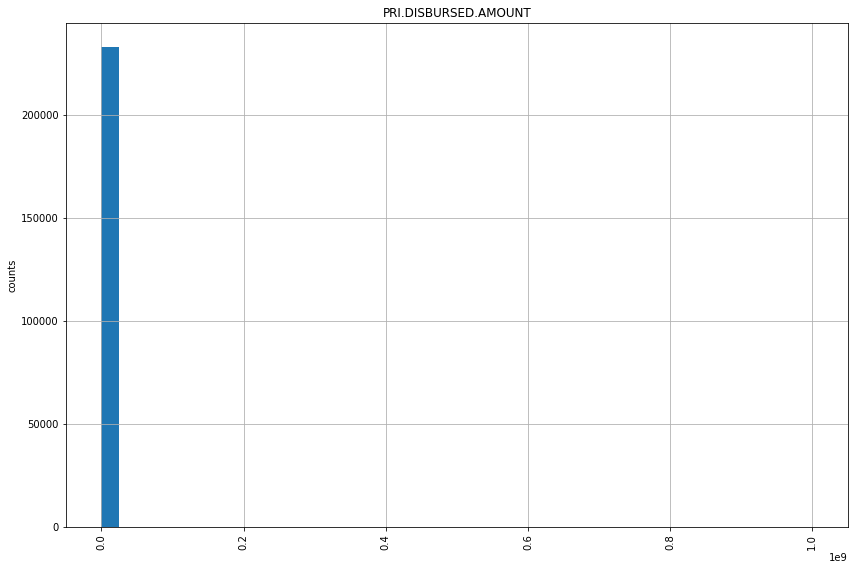

<Figure size 432x288 with 0 Axes>

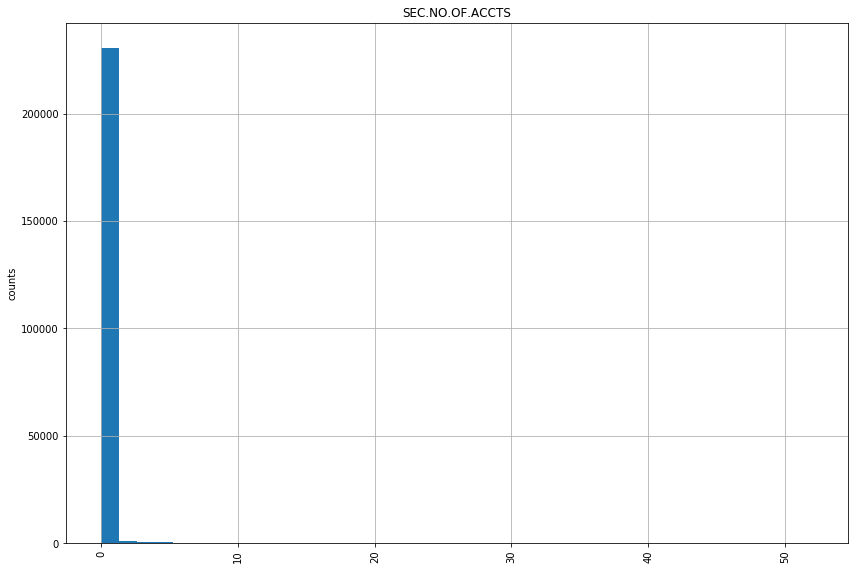

<Figure size 432x288 with 0 Axes>

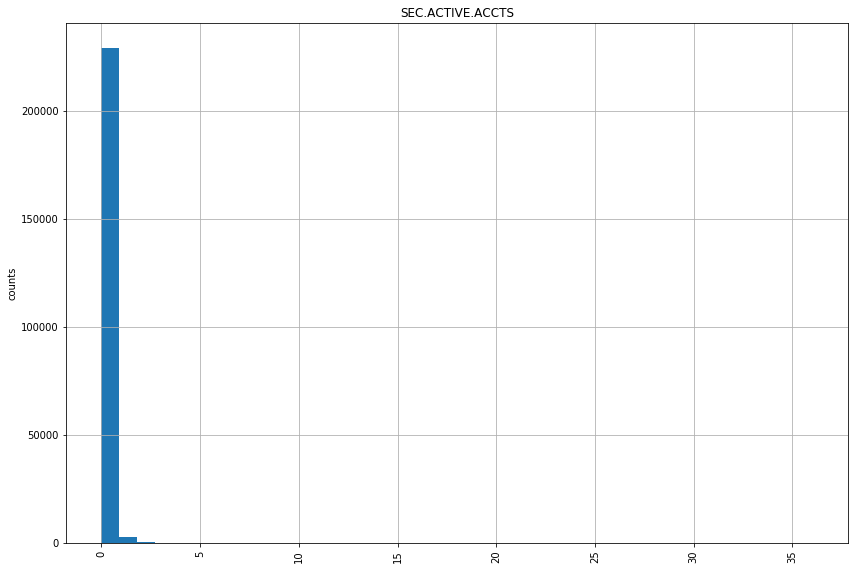

<Figure size 432x288 with 0 Axes>

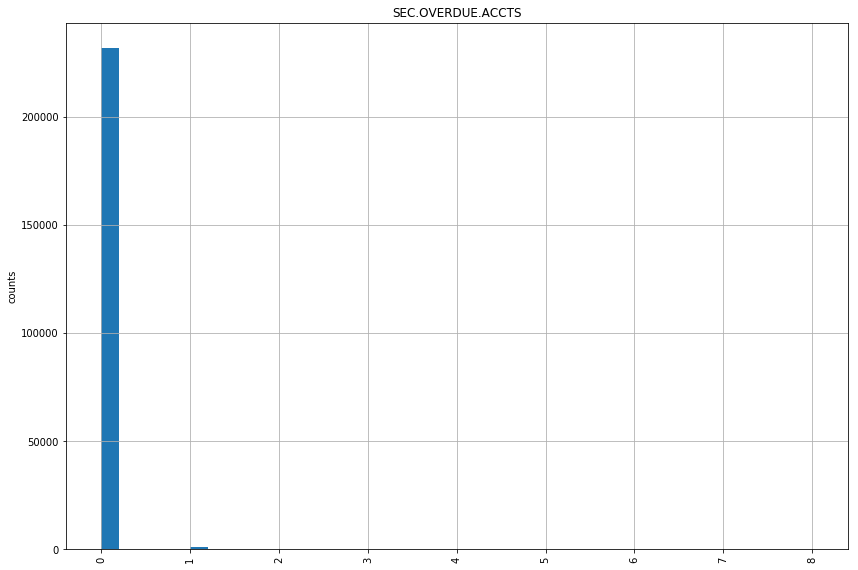

<Figure size 432x288 with 0 Axes>

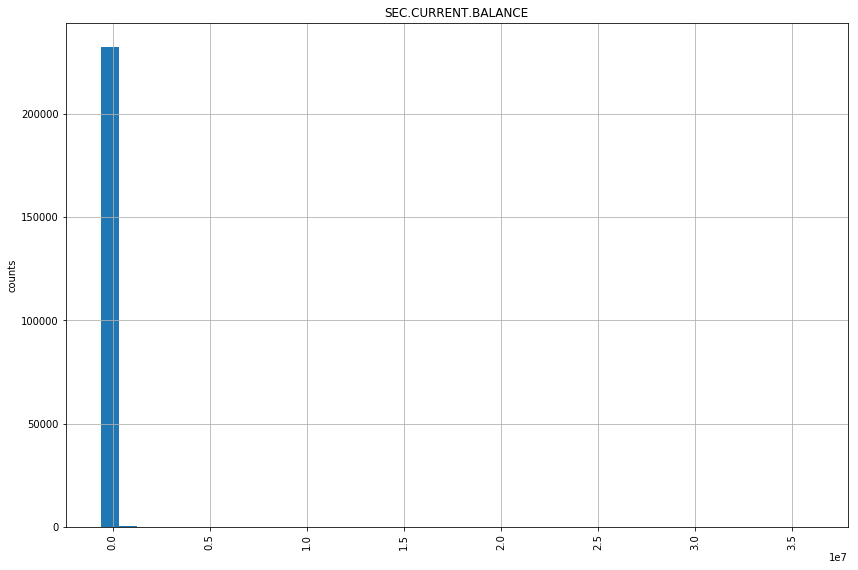

<Figure size 432x288 with 0 Axes>

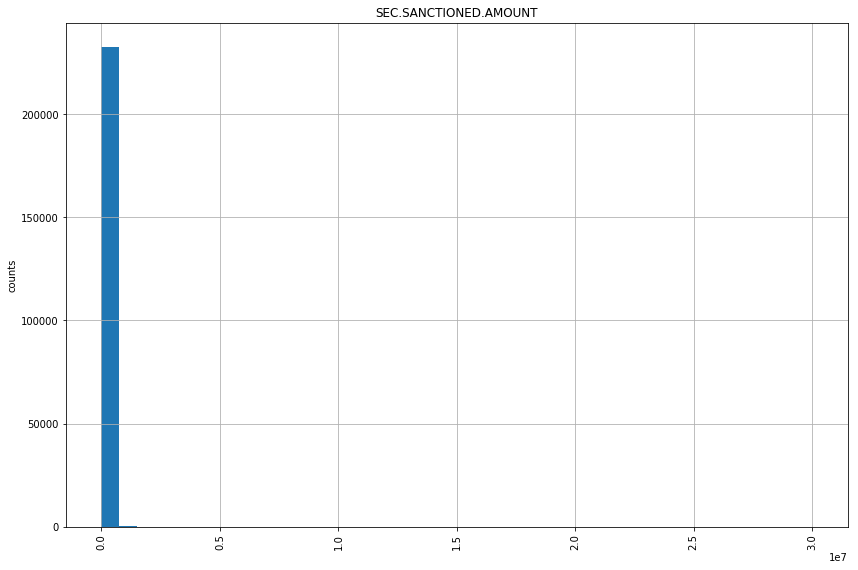

<Figure size 432x288 with 0 Axes>

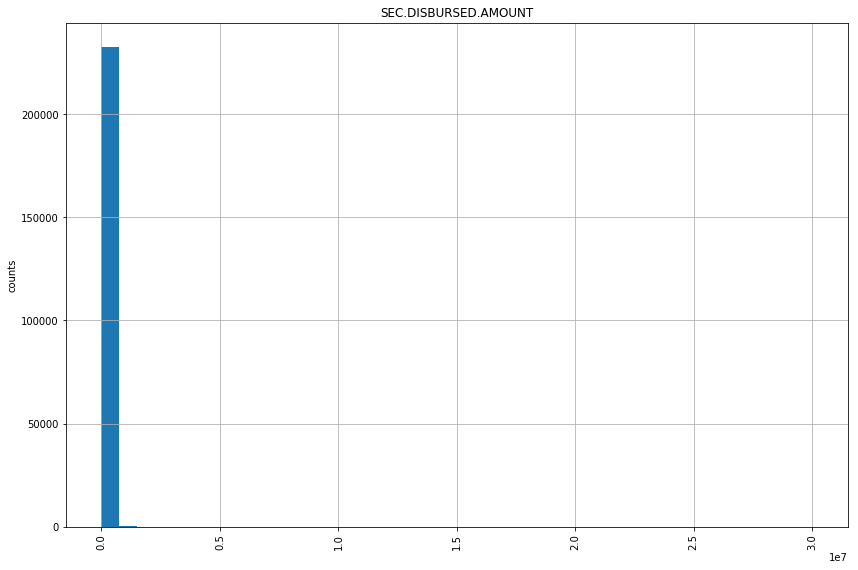

<Figure size 432x288 with 0 Axes>

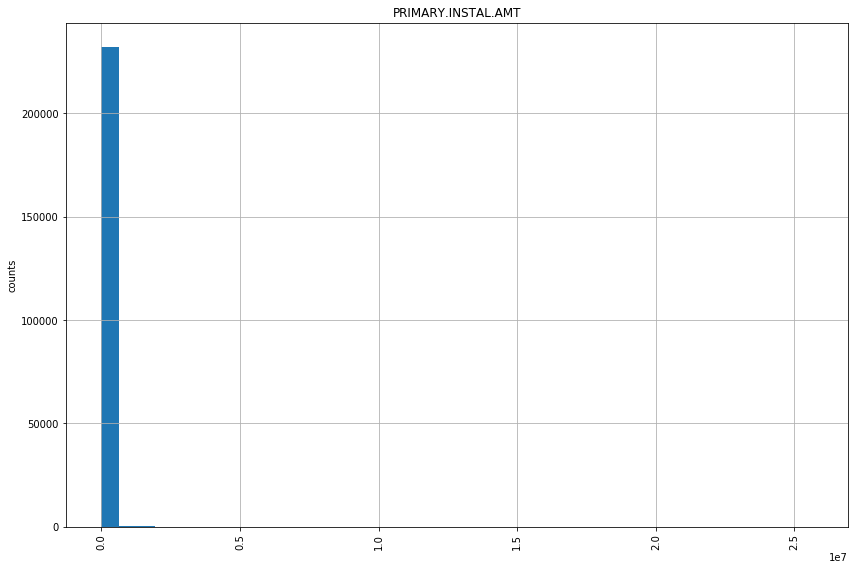

<Figure size 432x288 with 0 Axes>

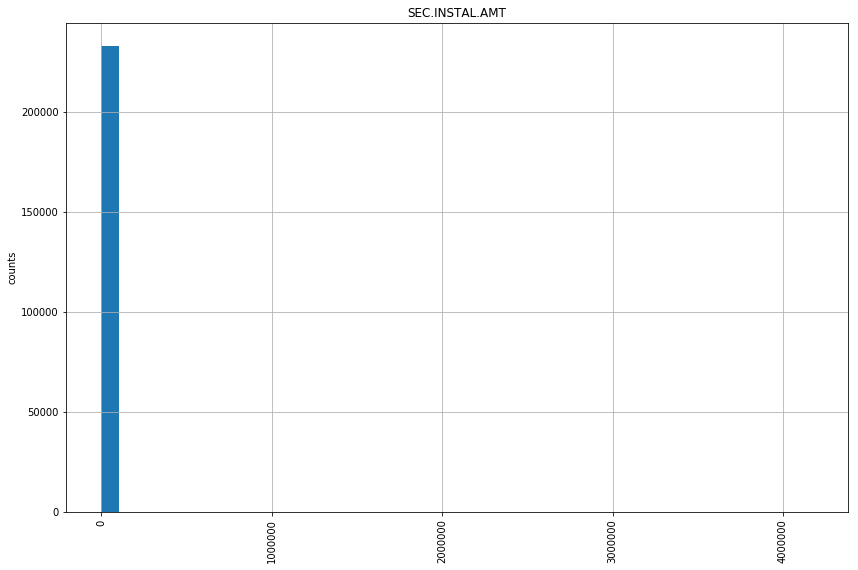

<Figure size 432x288 with 0 Axes>

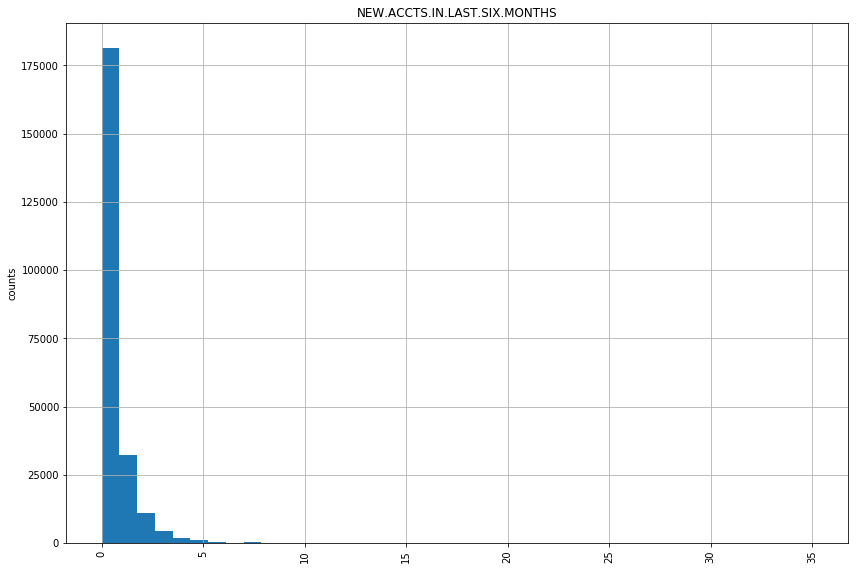

<Figure size 432x288 with 0 Axes>

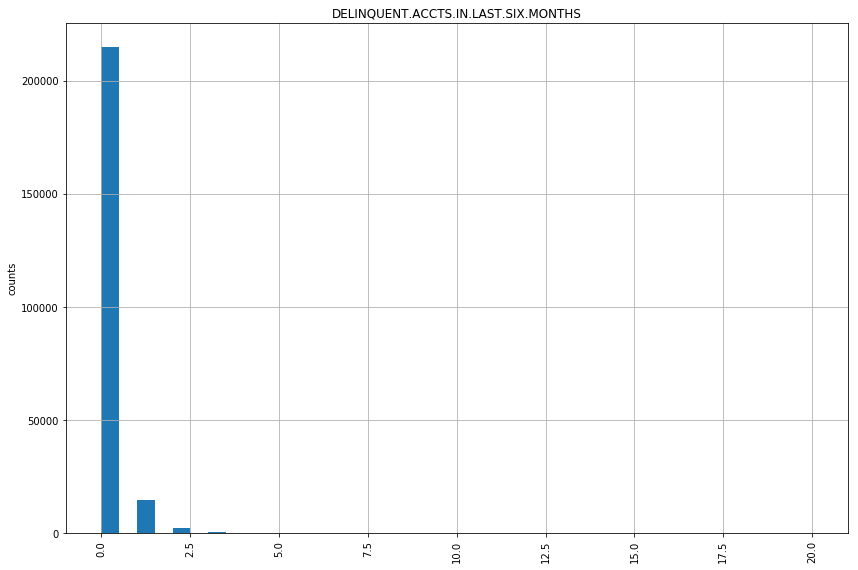

<Figure size 432x288 with 0 Axes>

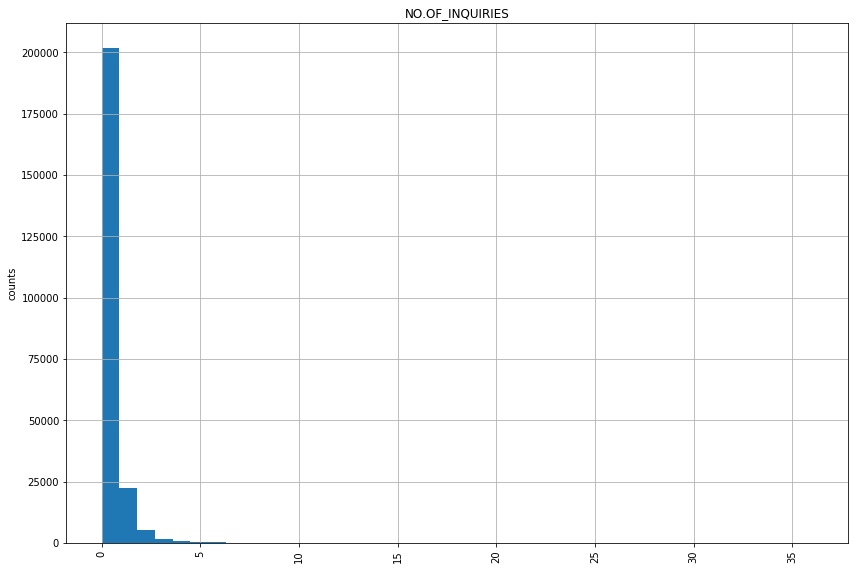

<Figure size 432x288 with 0 Axes>

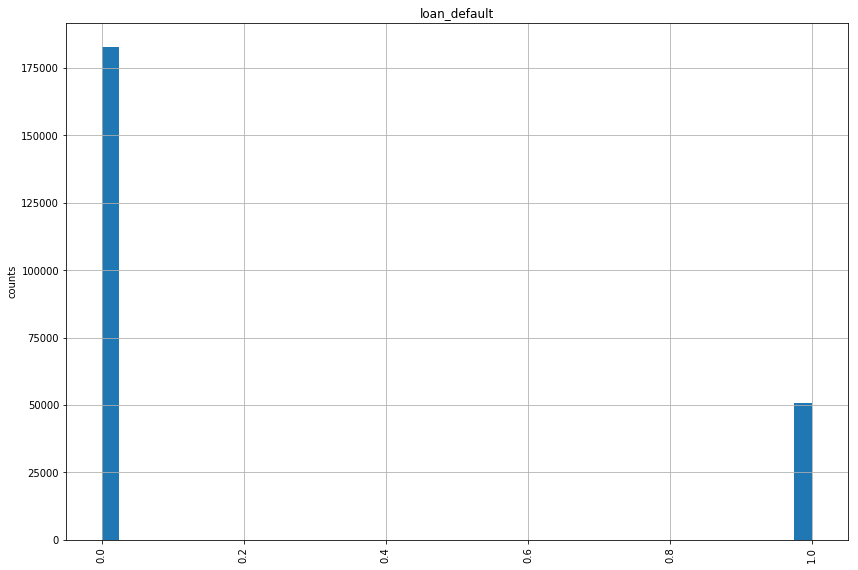

In [49]:
def hist_all_values():
    df1=tr.drop('UniqueID',axis=1)
    cols=tr.columns
    for col in cols:
        if (tr[col].dtypes !='object'):

            fig1=plt.figure()
            tr.hist(column=col,grid=True, figsize=(12,8),bins=40)
            plt.title(col)
            plt.ylabel('counts')
            plt.xticks(rotation = 90)
            plt.tight_layout(pad = 1.0, w_pad = 1.0, h_pad = 1.0)
            plt.show()
            
hist_all_values()

#### Visualizing the test data

In [51]:
ts.reset_index(inplace=True)

In [52]:
ts.head()

,UniqueID,disbursed_amount,asset_cost,ltv,branch_id,supplier_id,manufacturer_id,Current_pincode_ID,Date.of.Birth,Employment.Type,...,SEC.CURRENT.BALANCE,SEC.SANCTIONED.AMOUNT,SEC.DISBURSED.AMOUNT,PRIMARY.INSTAL.AMT,SEC.INSTAL.AMT,NEW.ACCTS.IN.LAST.SIX.MONTHS,DELINQUENT.ACCTS.IN.LAST.SIX.MONTHS,AVERAGE.ACCT.AGE,CREDIT.HISTORY.LENGTH,NO.OF_INQUIRIES
0,655269,53478,63558,86.54,67,22807,45,1497,01-01-74,Salaried,...,0,0,0,0,0,0,0,0yrs 0mon,0yrs 0mon,0
1,723482,55513,63163,89.45,67,22807,45,1497,20-05-85,Self employed,...,0,0,0,5605,0,1,0,0yrs 8mon,1yrs 0mon,1
2,758529,65282,84320,79.93,78,23135,86,2071,14-10-95,Salaried,...,0,0,0,0,0,0,0,0yrs 0mon,0yrs 0mon,0
3,763449,46905,63896,76.58,78,17014,45,2070,01-06-73,Self employed,...,0,0,0,0,0,0,0,2yrs 5mon,2yrs 5mon,0
4,708663,51428,63896,86.08,78,17014,45,2069,01-06-72,Salaried,...,0,0,0,0,0,0,0,0yrs 0mon,0yrs 0mon,0


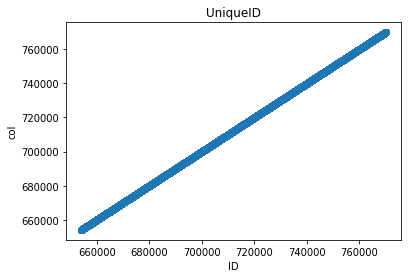

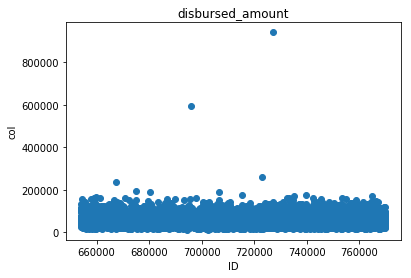

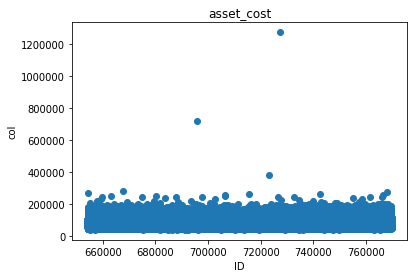

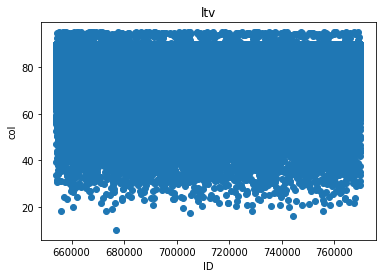

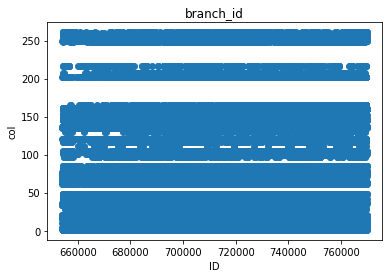

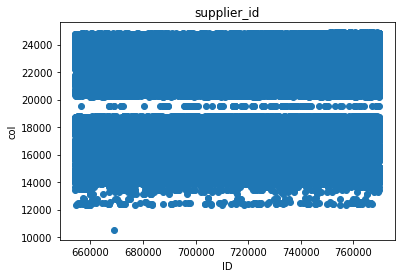

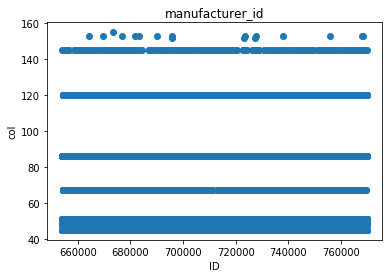

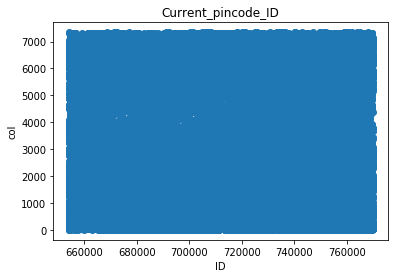

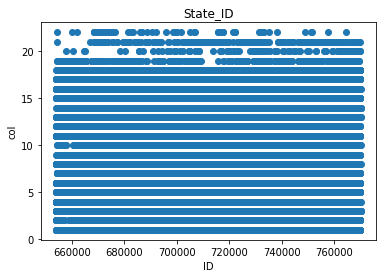

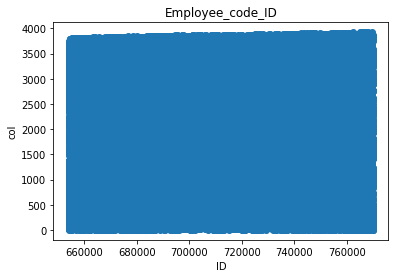

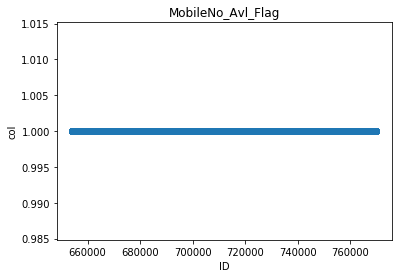

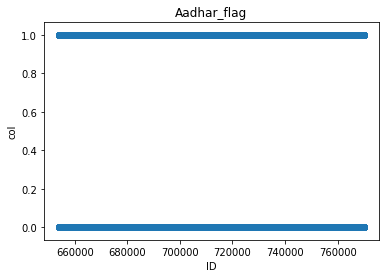

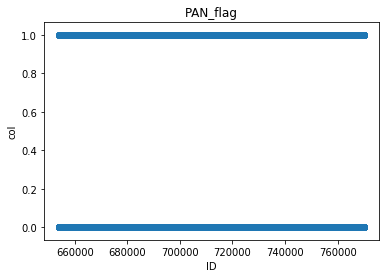

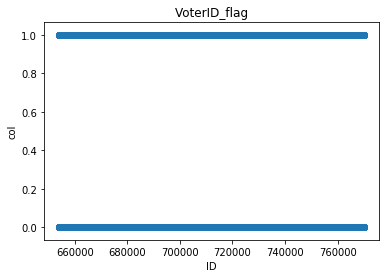

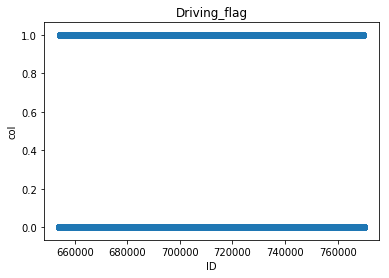

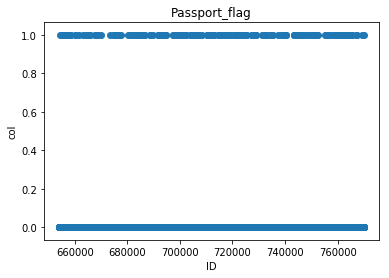

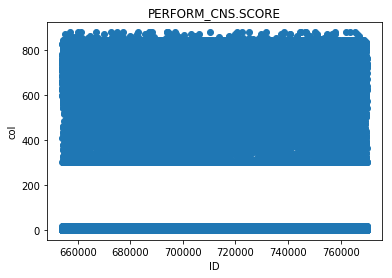

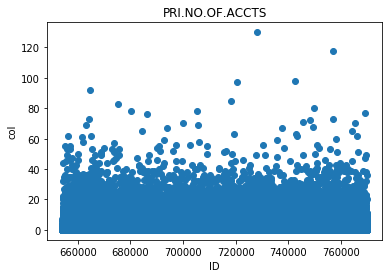

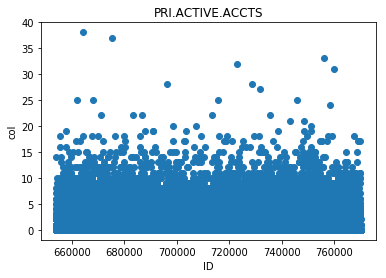

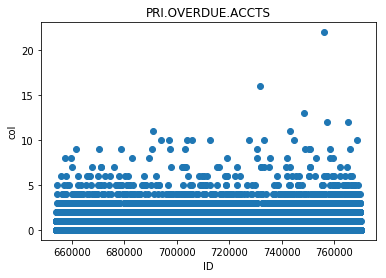

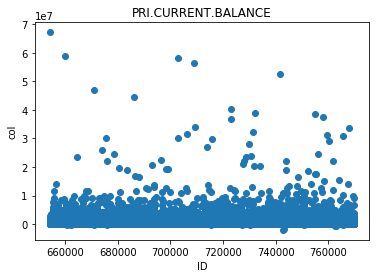

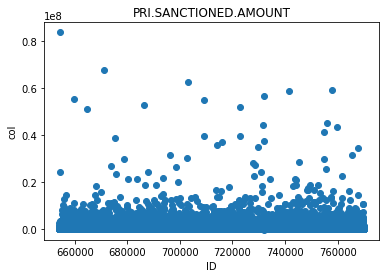

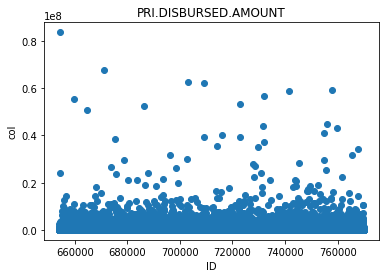

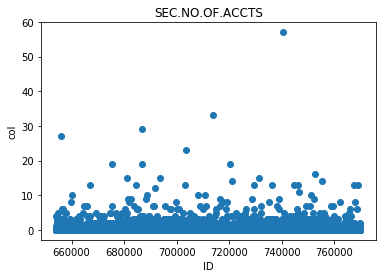

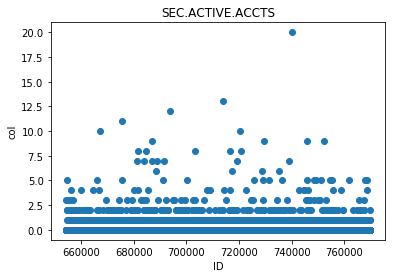

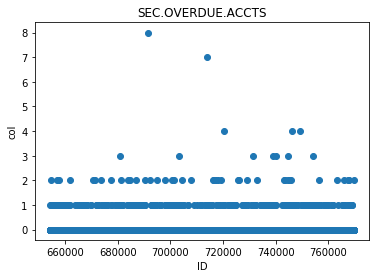

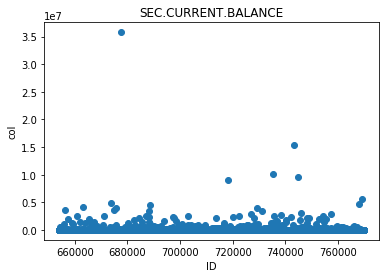

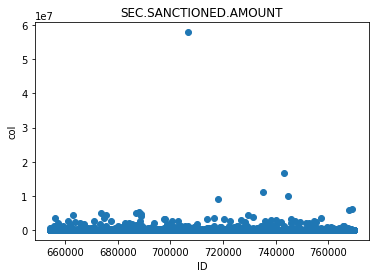

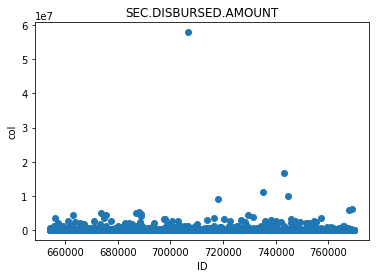

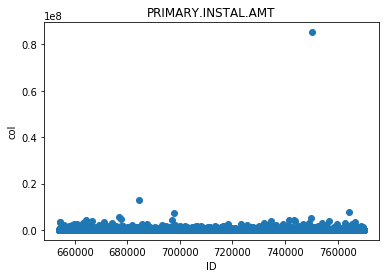

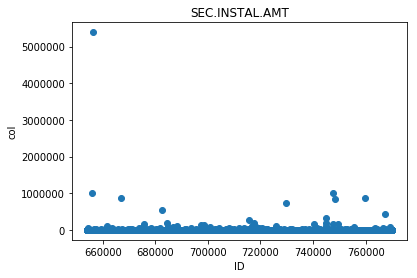

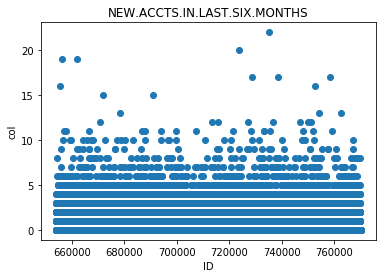

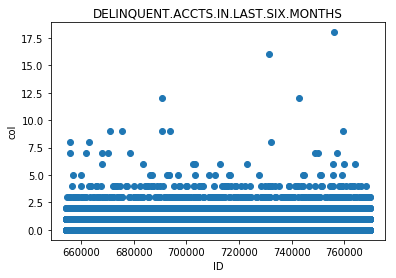

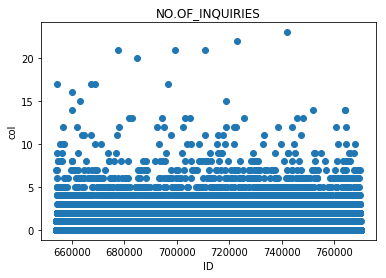

In [53]:
def print_test_values():
    df1=ts.drop('UniqueID',axis=1)
    cols=ts.columns
    for col in cols:
        if (ts[col].dtypes !='object'):

            fig1=plt.figure()
            ax1=plt.axes()
            plt.scatter(ts.UniqueID,ts[[col]],alpha=1)
            plt.title(col)
            ax1 = ax1.set(xlabel='ID', ylabel='col')
            plt.show()
            
            
print_test_values()

<Figure size 432x288 with 0 Axes>

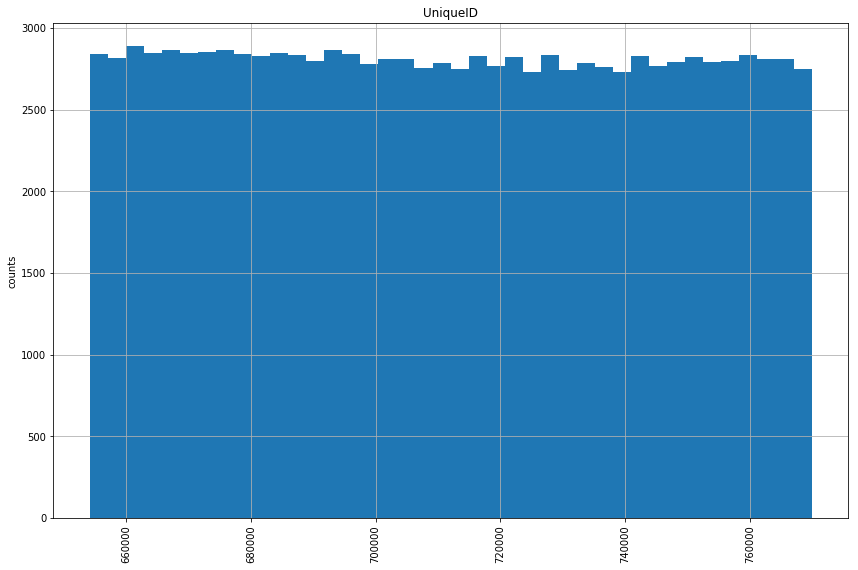

<Figure size 432x288 with 0 Axes>

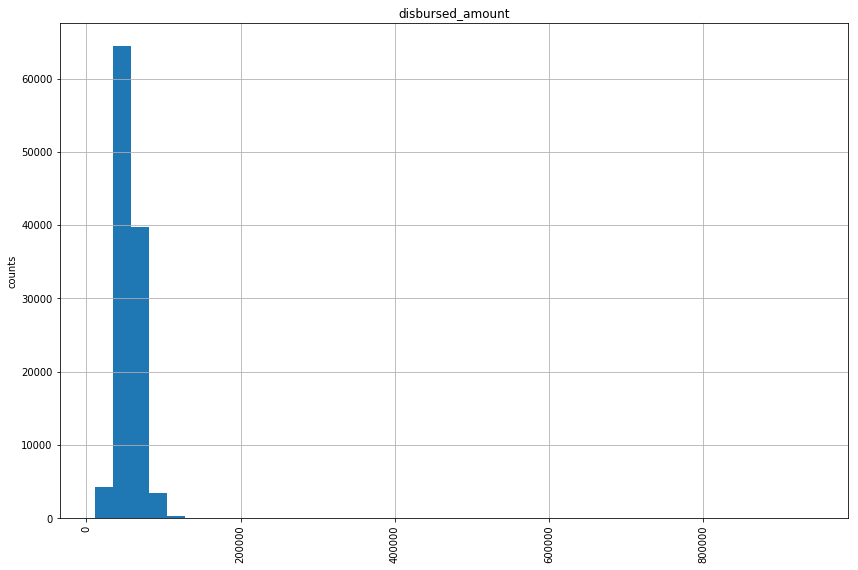

<Figure size 432x288 with 0 Axes>

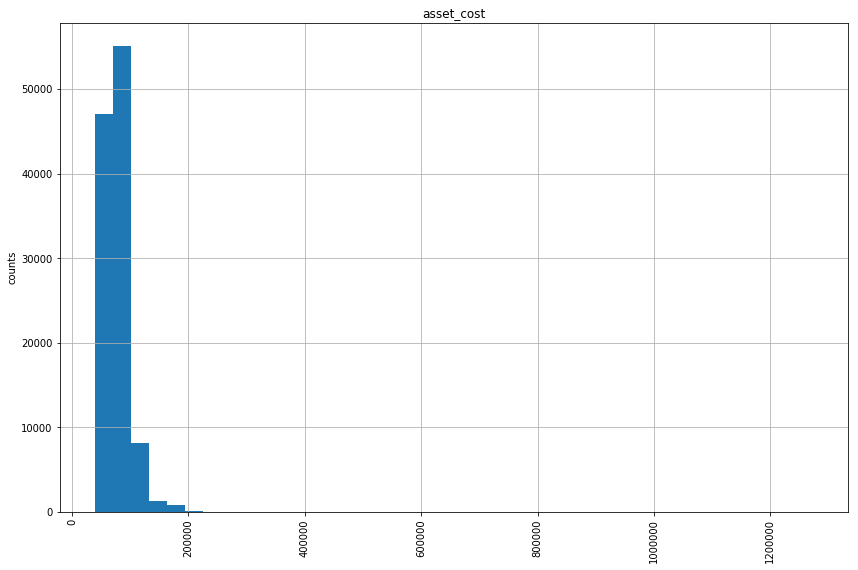

<Figure size 432x288 with 0 Axes>

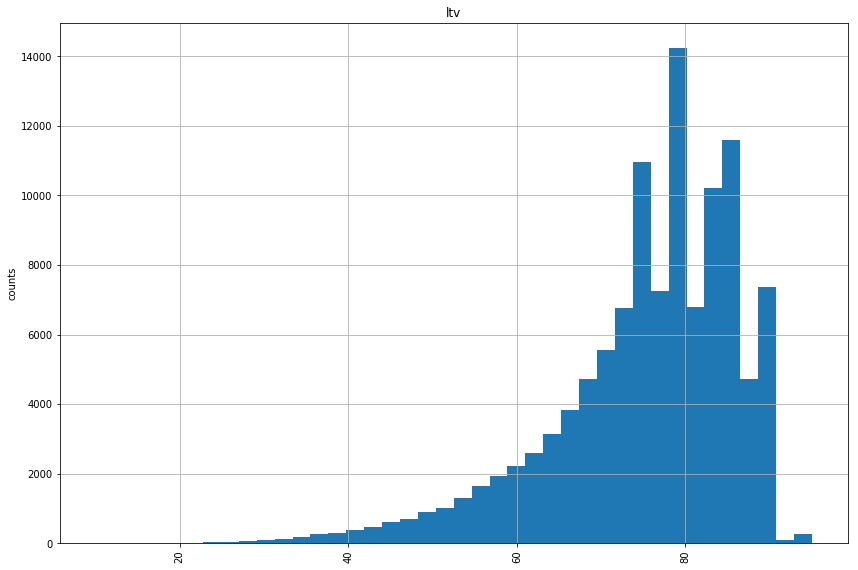

<Figure size 432x288 with 0 Axes>

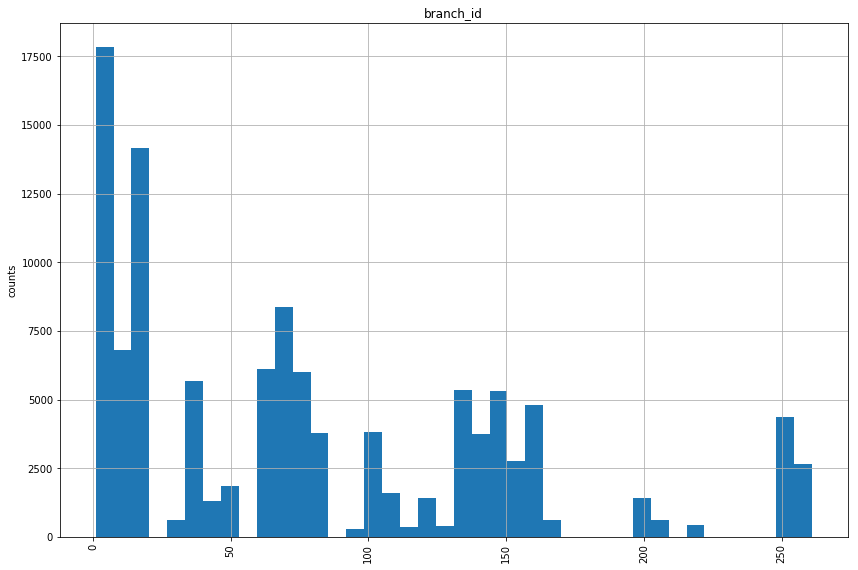

<Figure size 432x288 with 0 Axes>

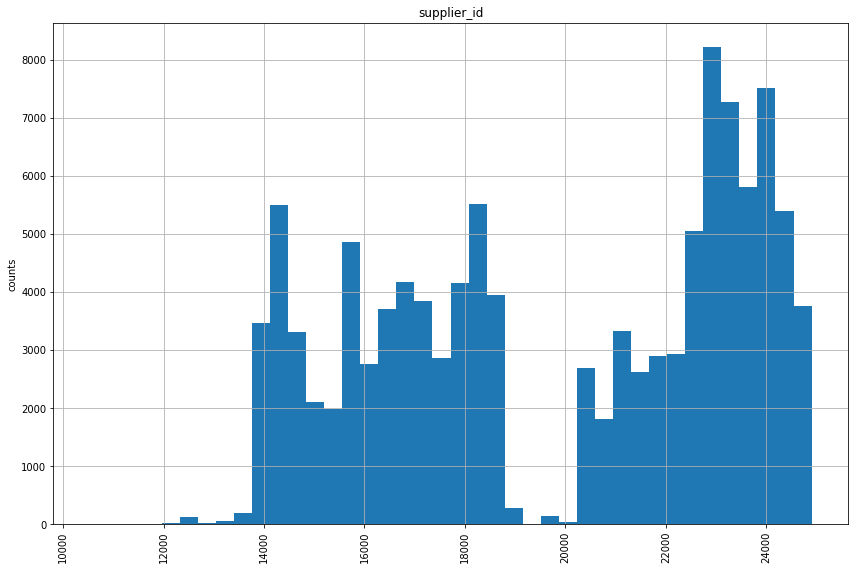

<Figure size 432x288 with 0 Axes>

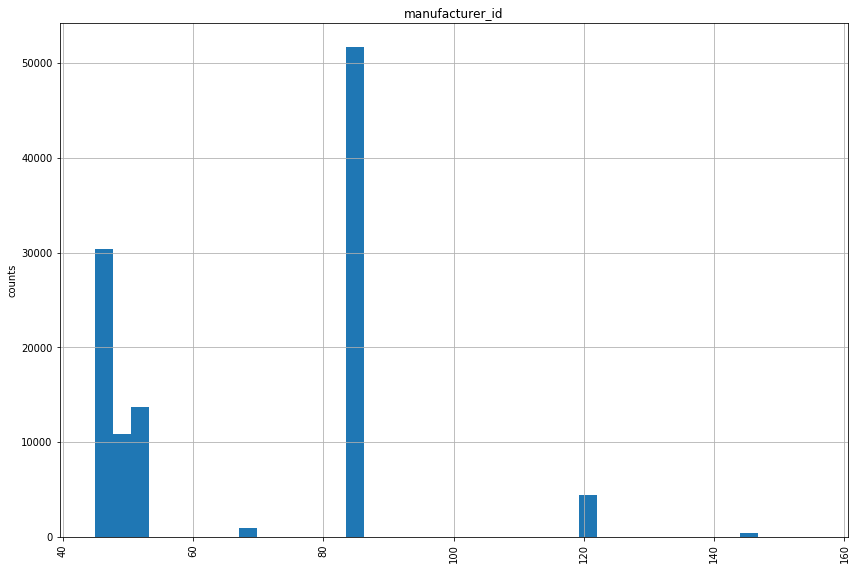

<Figure size 432x288 with 0 Axes>

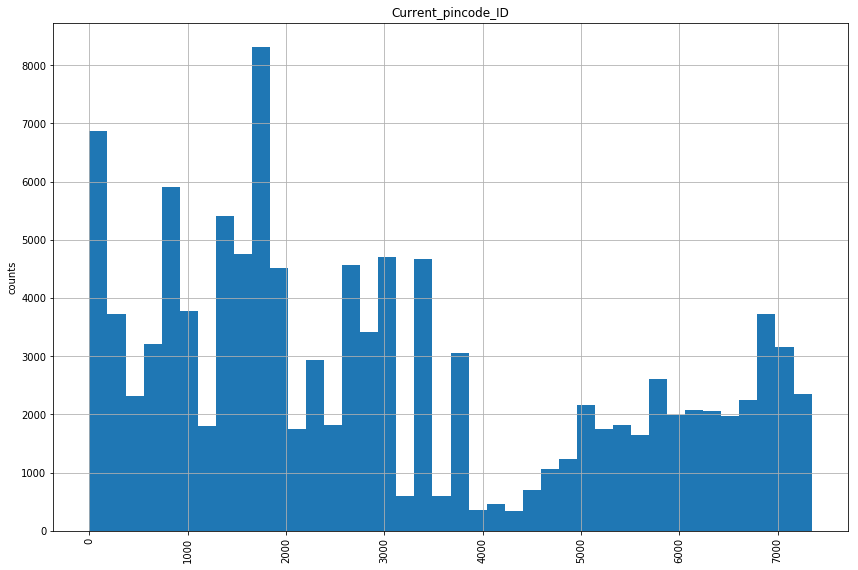

<Figure size 432x288 with 0 Axes>

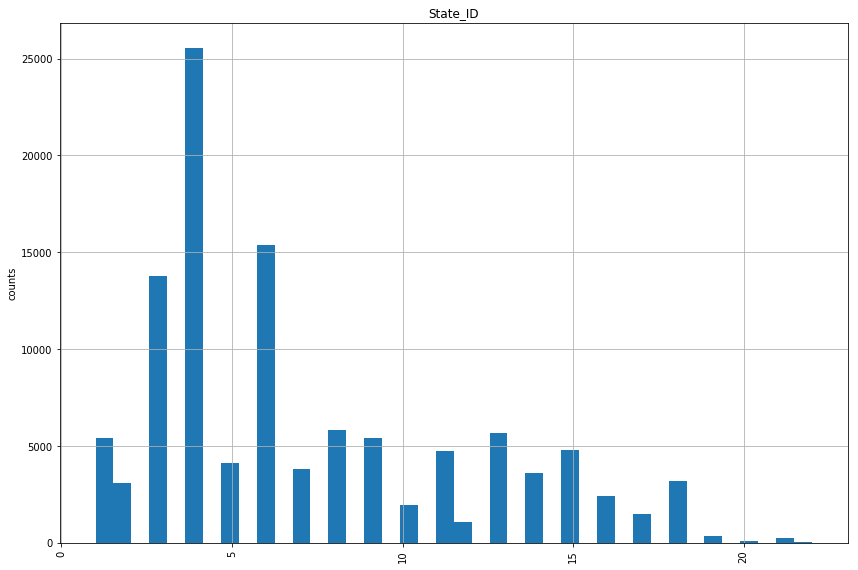

<Figure size 432x288 with 0 Axes>

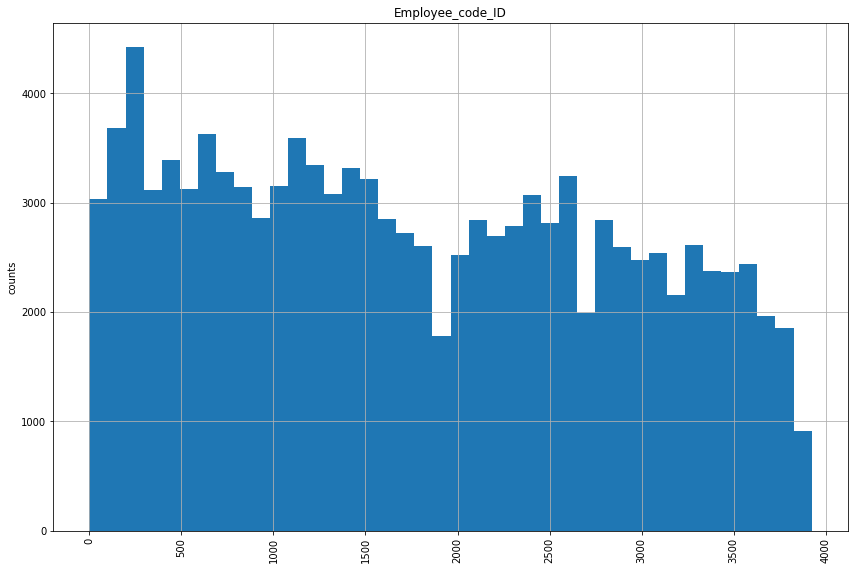

<Figure size 432x288 with 0 Axes>

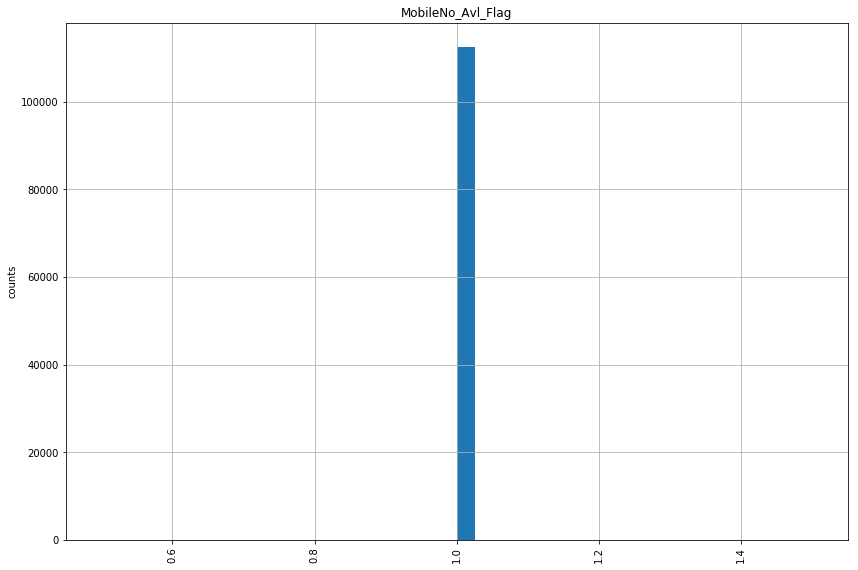

<Figure size 432x288 with 0 Axes>

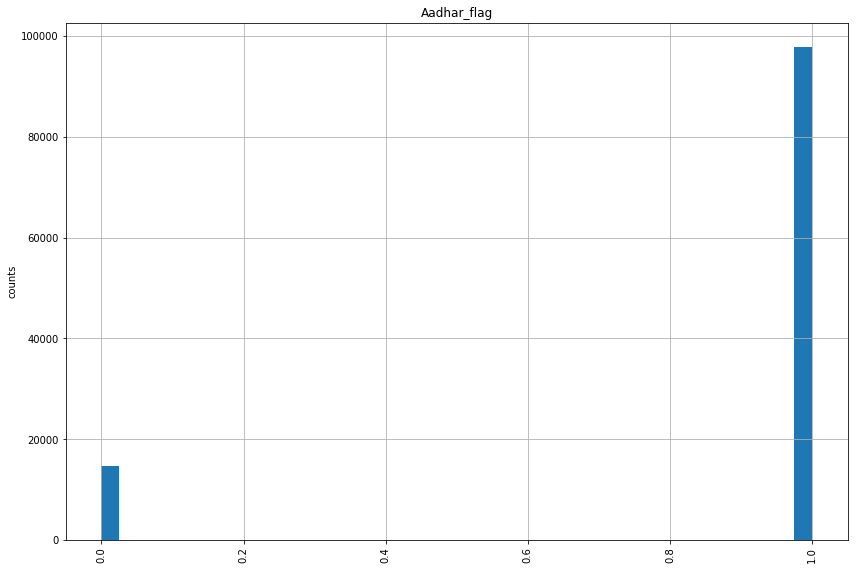

<Figure size 432x288 with 0 Axes>

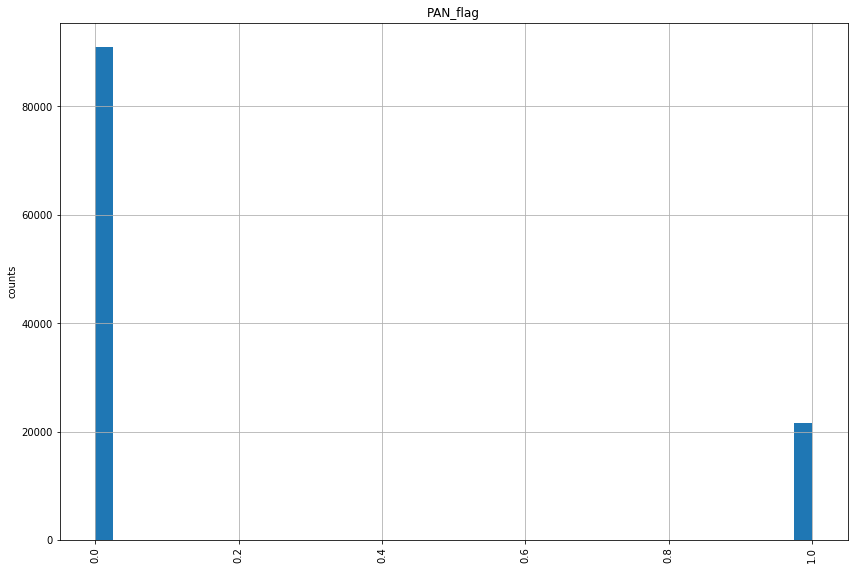

<Figure size 432x288 with 0 Axes>

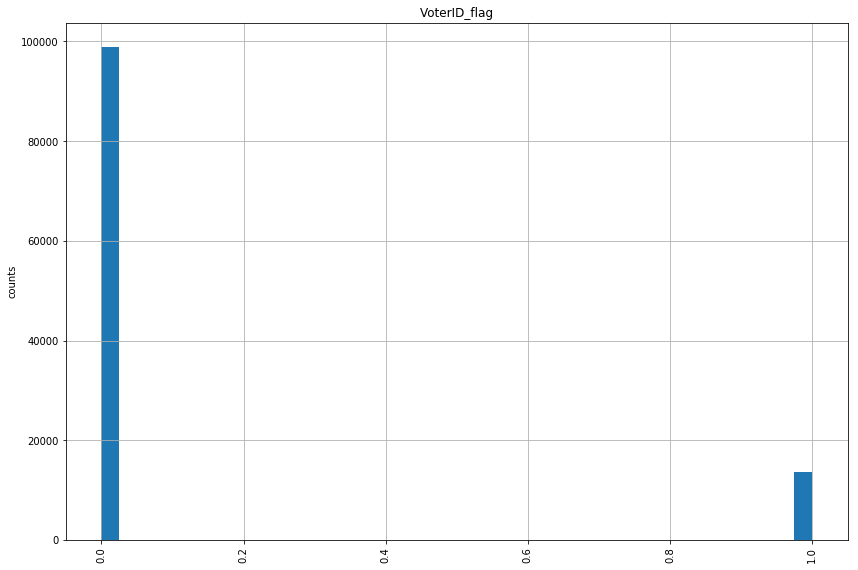

<Figure size 432x288 with 0 Axes>

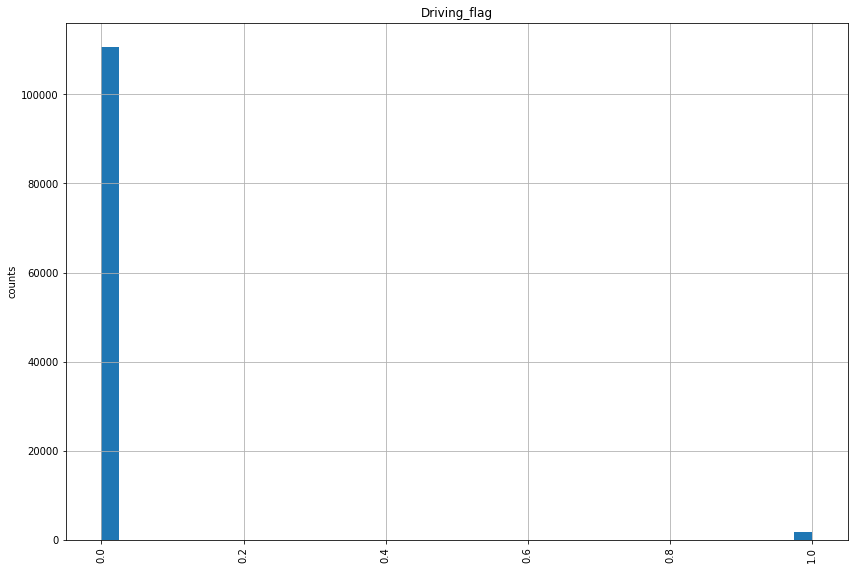

<Figure size 432x288 with 0 Axes>

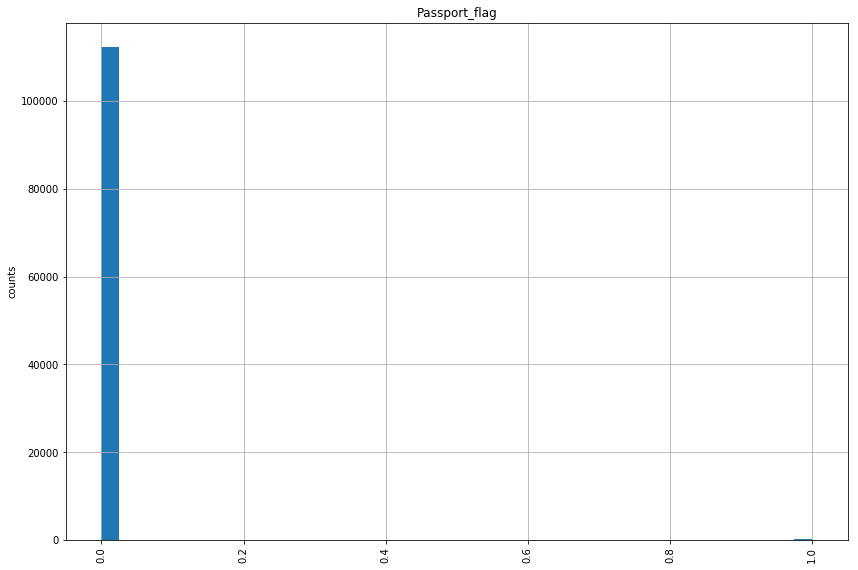

<Figure size 432x288 with 0 Axes>

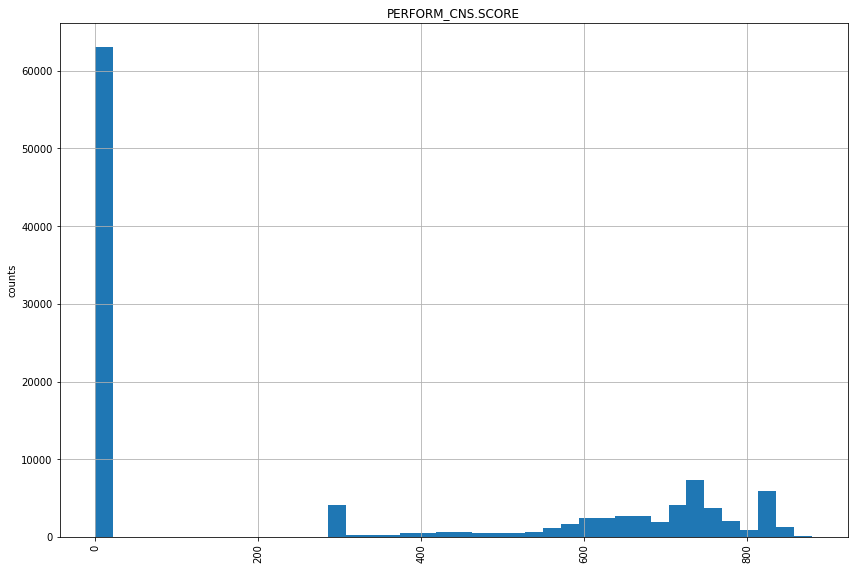

<Figure size 432x288 with 0 Axes>

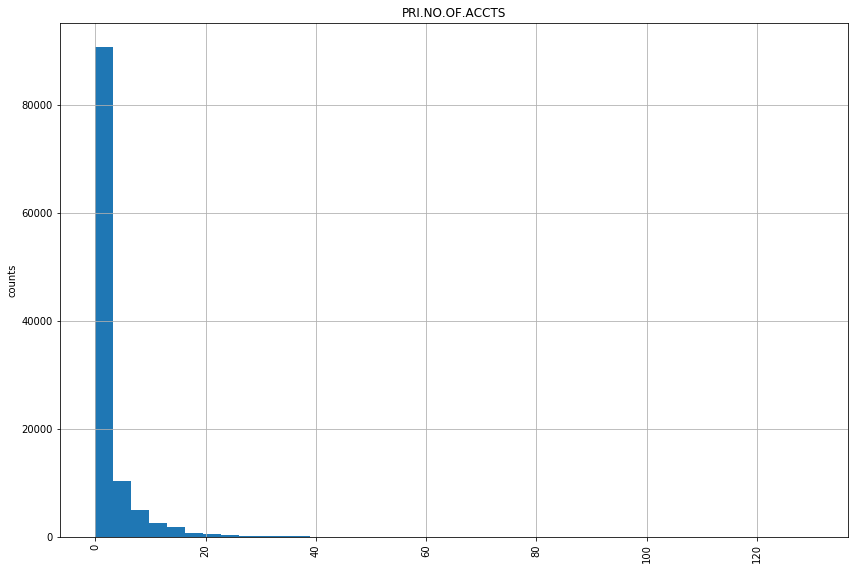

<Figure size 432x288 with 0 Axes>

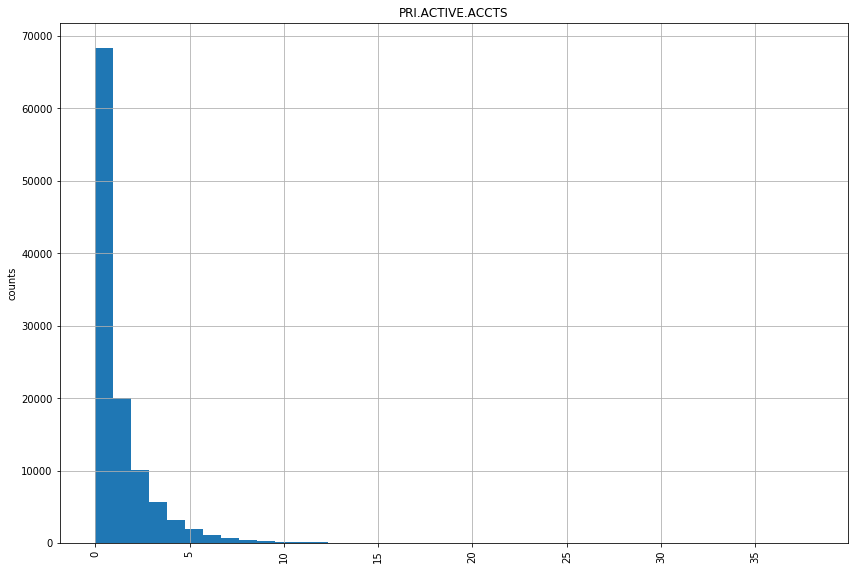

<Figure size 432x288 with 0 Axes>

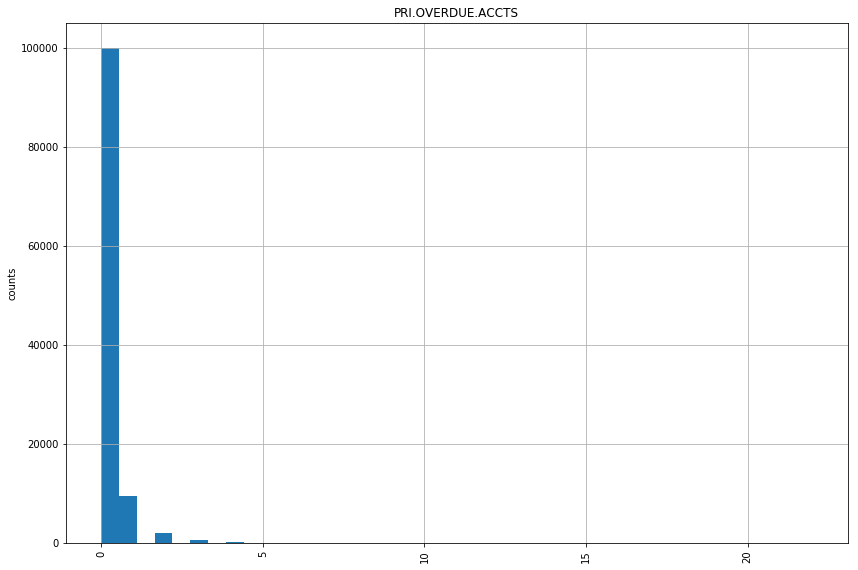

<Figure size 432x288 with 0 Axes>

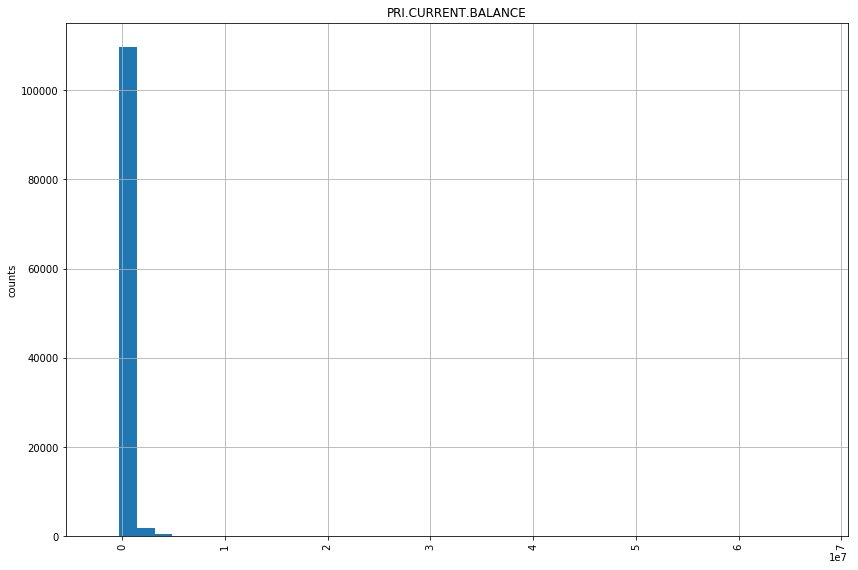

<Figure size 432x288 with 0 Axes>

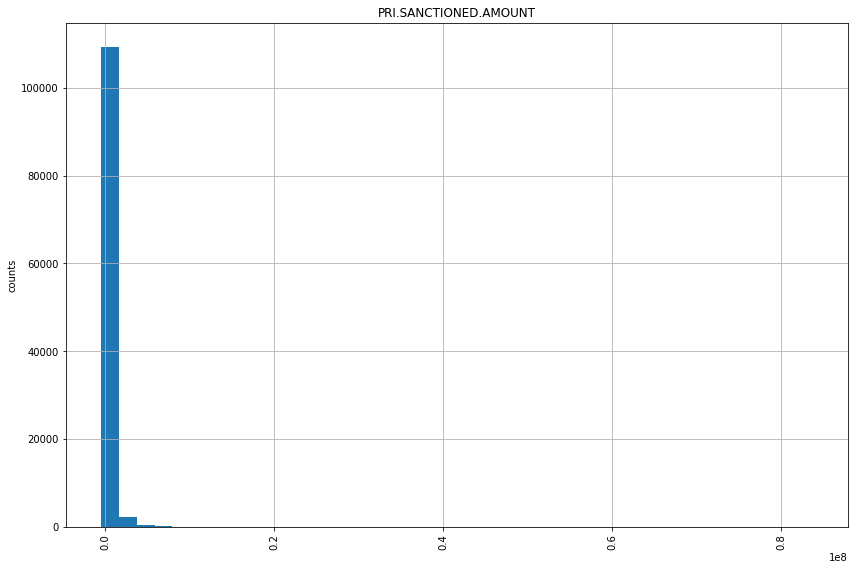

<Figure size 432x288 with 0 Axes>

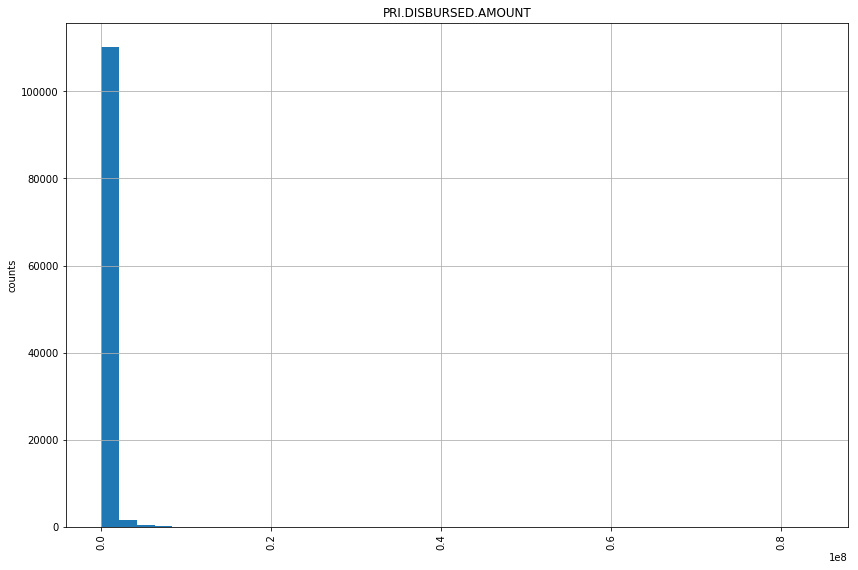

<Figure size 432x288 with 0 Axes>

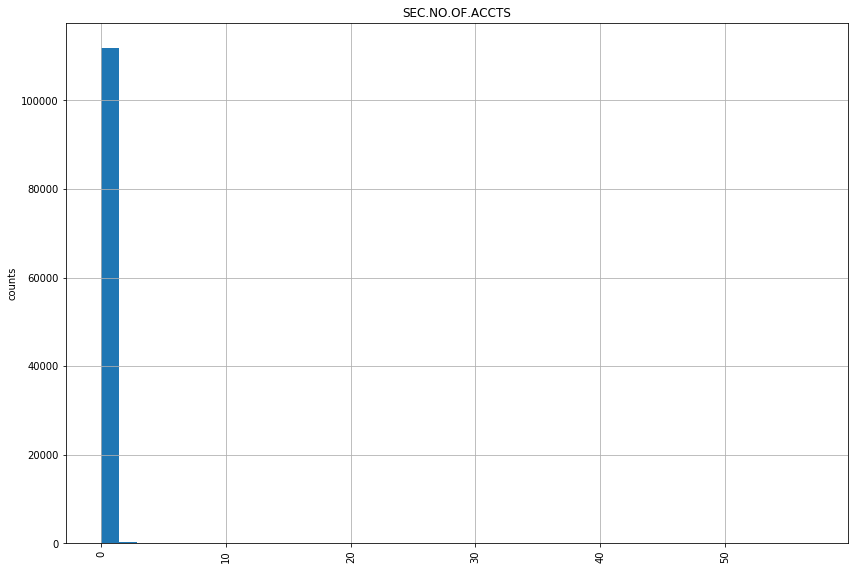

<Figure size 432x288 with 0 Axes>

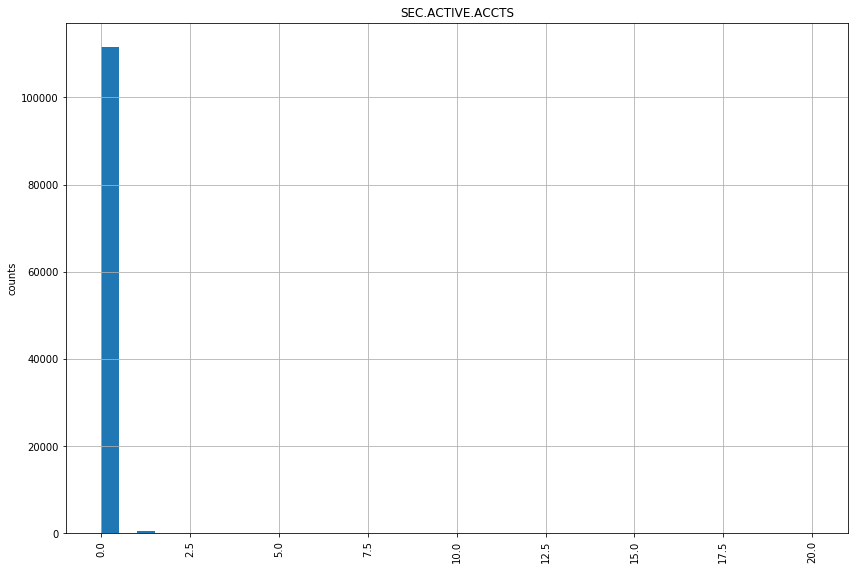

<Figure size 432x288 with 0 Axes>

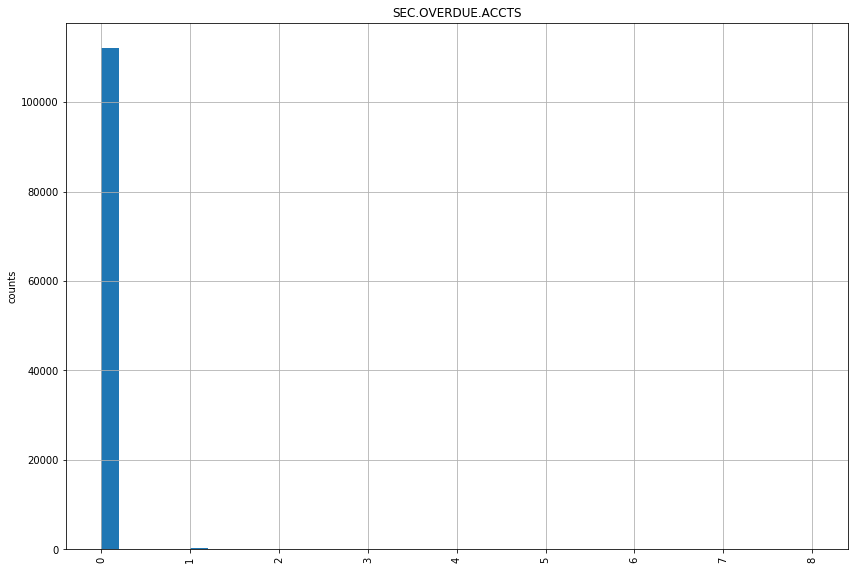

<Figure size 432x288 with 0 Axes>

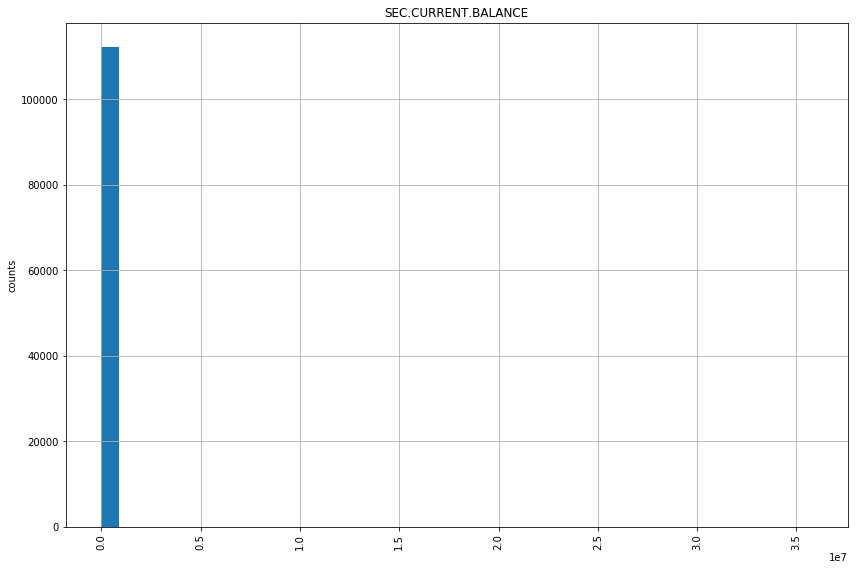

<Figure size 432x288 with 0 Axes>

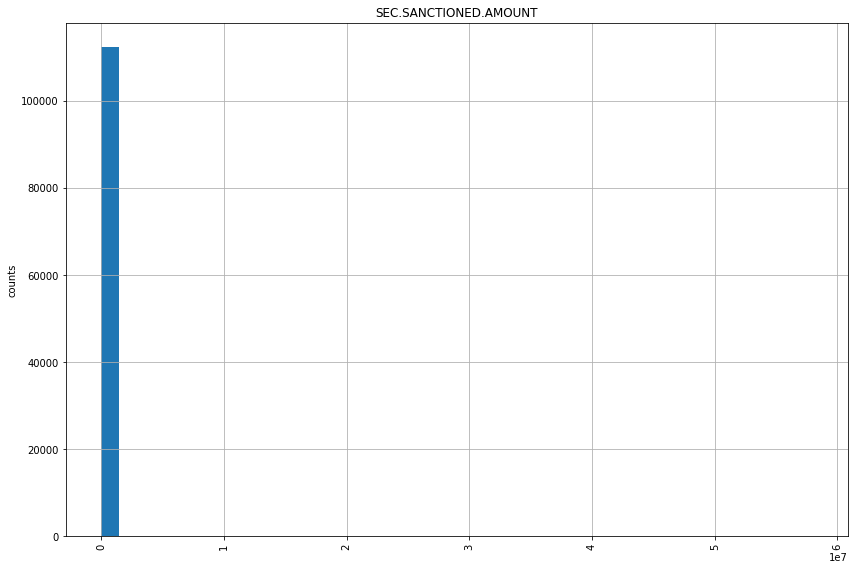

<Figure size 432x288 with 0 Axes>

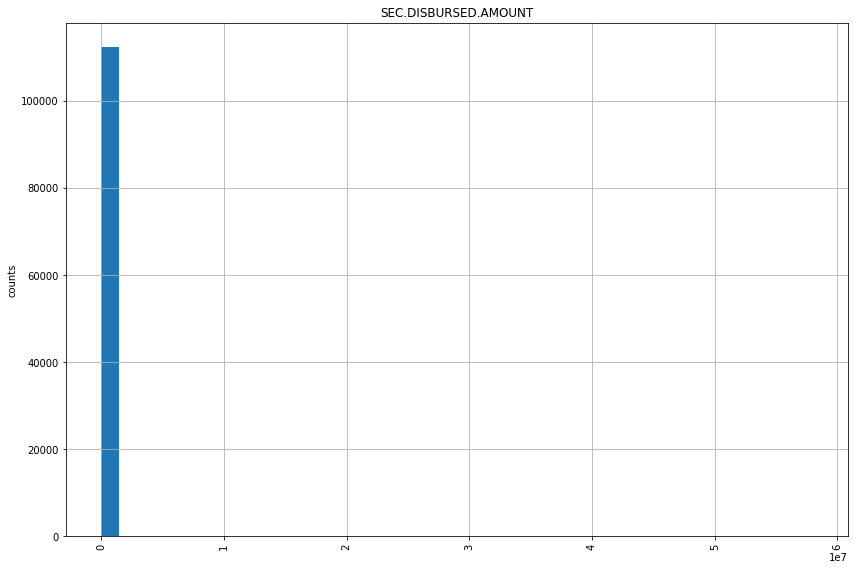

<Figure size 432x288 with 0 Axes>

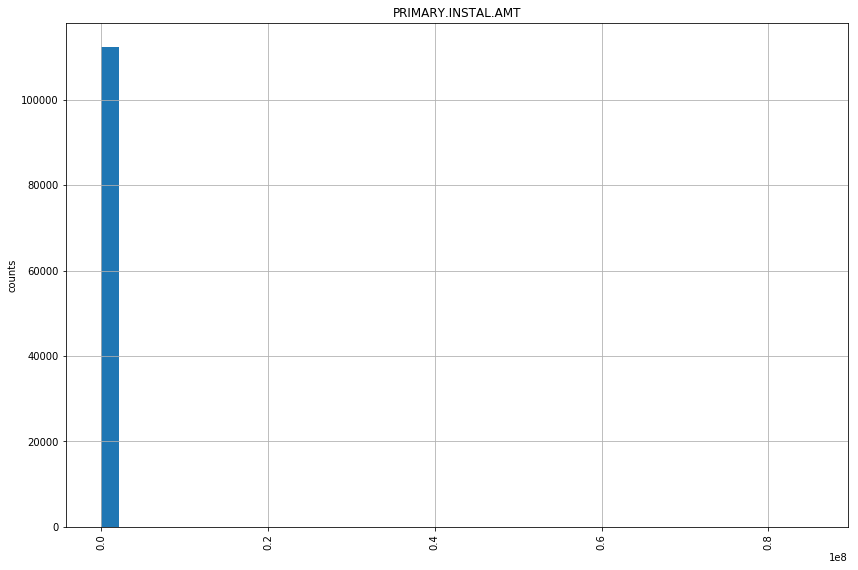

<Figure size 432x288 with 0 Axes>

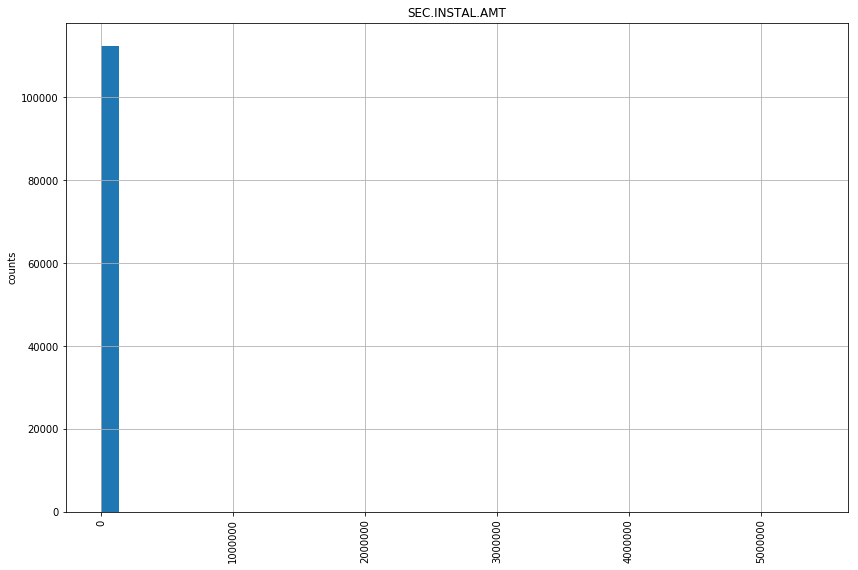

<Figure size 432x288 with 0 Axes>

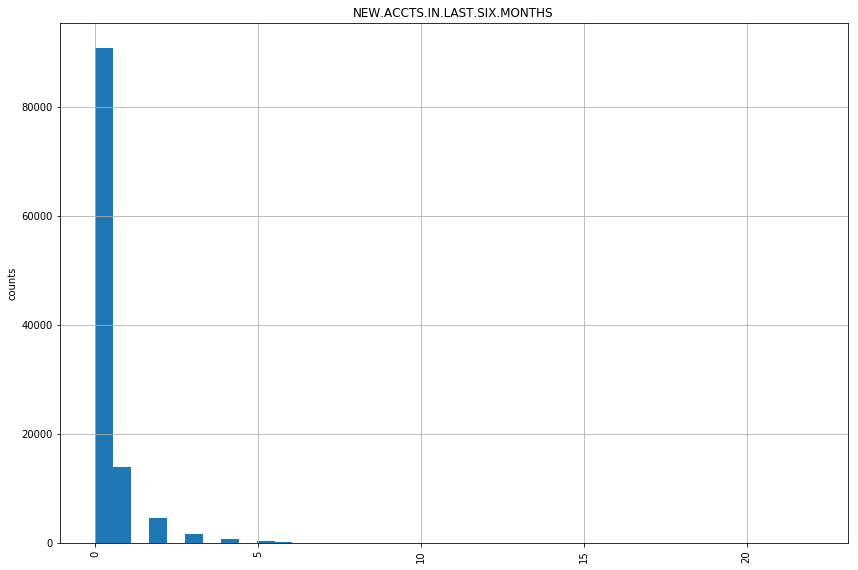

<Figure size 432x288 with 0 Axes>

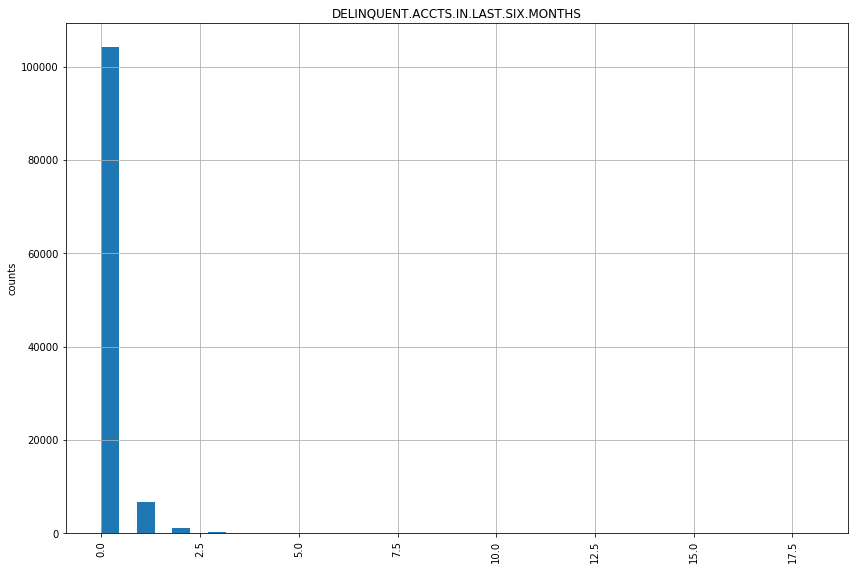

<Figure size 432x288 with 0 Axes>

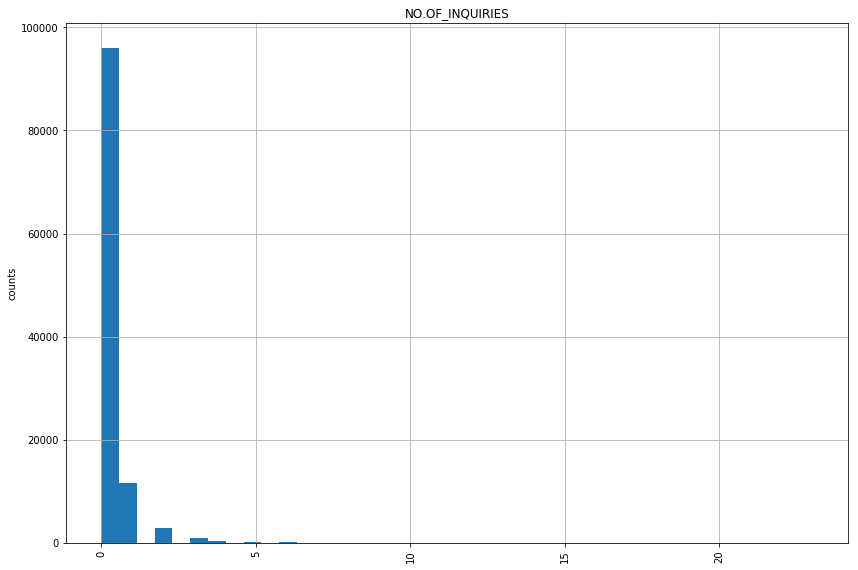

In [54]:
def hist_test_values():
    df1=ts.drop('UniqueID',axis=1)
    cols=ts.columns
    for col in cols:
        if (ts[col].dtypes !='object'):

            fig1=plt.figure()
            ts.hist(column=col,grid=True, figsize=(12,8),bins=40)
            plt.title(col)
            plt.ylabel('counts')
            plt.xticks(rotation = 90)
            plt.tight_layout(pad = 1.0, w_pad = 1.0, h_pad = 1.0)
            plt.show()
            
hist_test_values()

### Q1.4. Can you find trends (e.g. high, low, increasing, decreasing, anomalies)?

From the scatter plot and histogram we can easiy interpret that mostly the accounts which wre provided loan were around the november month of the year 2018 and still there are some deliquents accouints which means some have already made loan defaults.

The anomalies would be that te risk of losan default increases as the age of the person increases, but as per the data provide there are loan default by people with almost age group as young as born in year 1993.


### Q1.5. Can you compare two related quantities?

There is no way to compare the relatred quatities as the probability of default doesnot only remains on one of the factor but it varies as per the many factors acting as features for the profile.

### Q2. Looking at the plots, what are some insights you can make? Do you see any correlations? Is there a hypothesis you’d like to investigate further? What other questions do the insights lead you to ask?

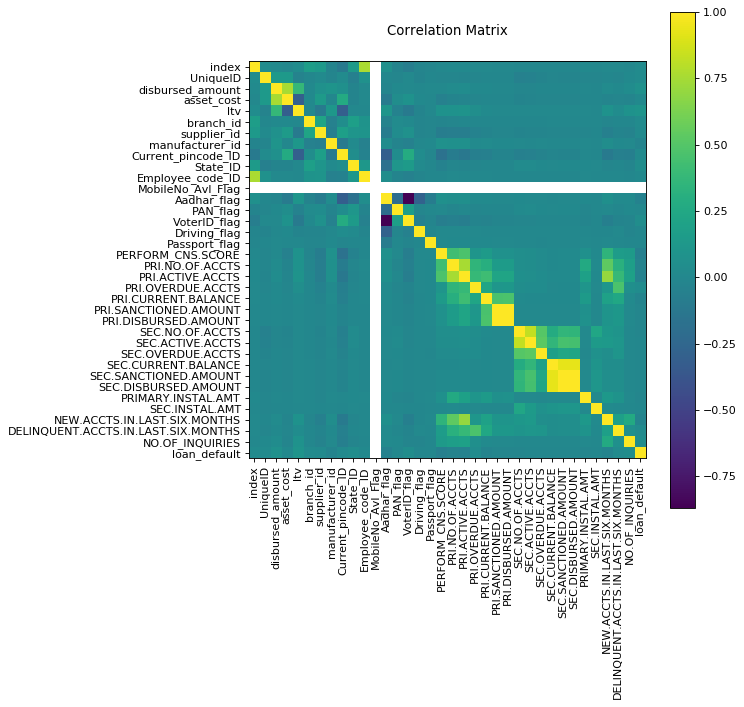

In [55]:
correlationplot(tr,8)

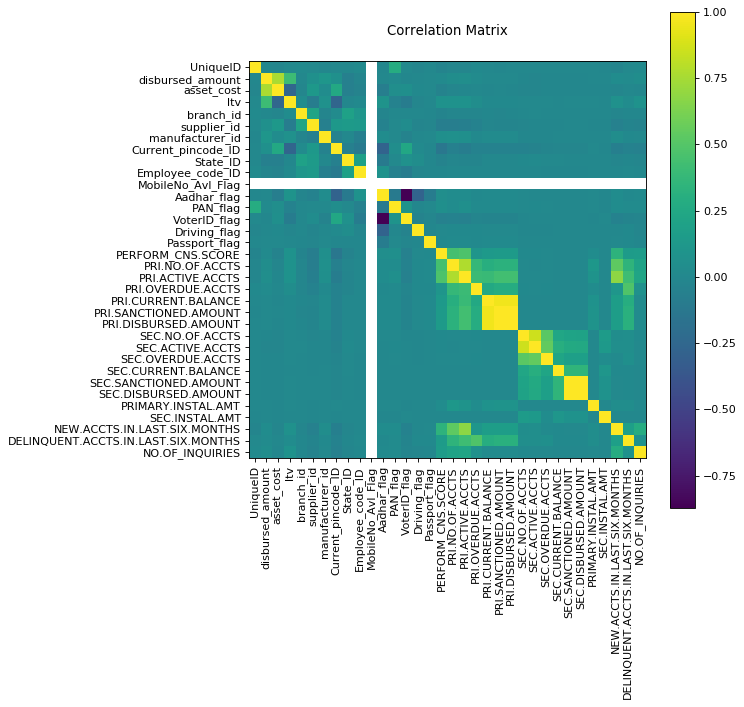

In [56]:
correlationplot(ts,8)

Missing values are shown by the white lines.

From the above correlation matrix we can observe that the loan default is highly correlated with number of inquiries and number of overdue accounts.

### Doubt
I don't need the feel for performing any hypothesis test. Please suggest if required

Other question can be asked as the disbursed amount should also be related highly with the chance of loan default. Thouigh it also affects the chanches but the correlation matrix cleraly depicts that the account with previous default history are risky and the loan provided to them should be with more caution.

### Q3. Now that you’ve asked questions, hopefully you’ve found some interesting insights. Is there a narrative or a way of presenting the insights using text and plots that tells a compelling story? What are some other trends/relationships you think will make the story more complete?


In [58]:
tr.head()

,index,UniqueID,disbursed_amount,asset_cost,ltv,branch_id,supplier_id,manufacturer_id,Current_pincode_ID,Date.of.Birth,...,SEC.SANCTIONED.AMOUNT,SEC.DISBURSED.AMOUNT,PRIMARY.INSTAL.AMT,SEC.INSTAL.AMT,NEW.ACCTS.IN.LAST.SIX.MONTHS,DELINQUENT.ACCTS.IN.LAST.SIX.MONTHS,AVERAGE.ACCT.AGE,CREDIT.HISTORY.LENGTH,NO.OF_INQUIRIES,loan_default
0,0,420825,50578,58400,89.55,67,22807,45,1441,01-01-84,...,0,0,0,0,0,0,0yrs 0mon,0yrs 0mon,0,0
1,1,537409,47145,65550,73.23,67,22807,45,1502,31-07-85,...,0,0,1991,0,0,1,1yrs 11mon,1yrs 11mon,0,1
2,2,417566,53278,61360,89.63,67,22807,45,1497,24-08-85,...,0,0,0,0,0,0,0yrs 0mon,0yrs 0mon,0,0
3,3,624493,57513,66113,88.48,67,22807,45,1501,30-12-93,...,0,0,31,0,0,0,0yrs 8mon,1yrs 3mon,1,1
4,4,539055,52378,60300,88.39,67,22807,45,1495,09-12-77,...,0,0,0,0,0,0,0yrs 0mon,0yrs 0mon,1,1


KeyboardInterrupt: 

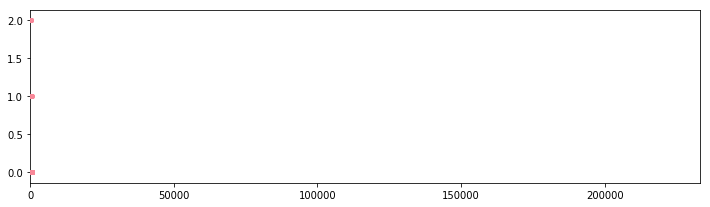

In [66]:
plt.subplot(2,1,1)
sns.swarmplot(x='UniqueID',y= 'DELINQUENT.ACCTS.IN.LAST.SIX.MONTHS', data = tr)
plt.show()